<img src='https://weclouddata.com/wp-content/uploads/2016/11/logo.png' width='30%'>
-------------

<h3 align='center'> Applied Machine Learning Course - Lab Week 1 Solutions </h3>
<h1 align='center'> Linear Regression </h1>

<br>
<center align="left"> Developed by:</center>
<center align="left"> WeCloudData Academy </center>


### Packages Used:

- [NumPy](http://www.numpy.org/): a fundamental package for scientific computing with Python.
- [seaborn](https://seaborn.pydata.org/): statistical data visualization.
- [Bokeh](http://bokeh.pydata.org/en/latest/): a Python interactive visualization library that targets modern web browsers for presentation.
- [Matplotlib](https://matplotlib.org/): a Python 2D plotting library.
- [Sklearn](http://scikit-learn.org/stable/): Machine Learning tools in Python.
- [SciPy](https://www.scipy.org/): a Python-based ecosystem of open-source software for mathematics, science, and engineering.
- [JSAnimation](https://github.com/jakevdp/JSAnimation): an HTML/Javascript writer for Matplotlib animations.
-------

# Content

- [Optimzation](#Optimzation)
  - Minimizing a quadratic equation using calculus
  - Minimizing a quadratic equation using Gradient Descent
- [Linear regression](#Linear-regression)
  - Data preparation
  - Train linear regressor analytically
  - Train linear regression using sklearn

In [1]:
# loading necessary libraries and setting up plotting libraries
import numpy as np
import seaborn as sns

import bokeh.plotting as bp
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from sklearn.datasets.samples_generator import make_regression 
from scipy import stats 
from bokeh.models import  WheelZoomTool, ResetTool, PanTool
from bokeh.layouts import gridplot
from JSAnimation import IPython_display

W = 590
H = 350
bp.output_notebook()

%matplotlib inline

Loading BokehJS ...

# Optimzation

## $\Delta$ 1. Minimizing a quadratic equation using calculus

Let's suppose we have a simple quadratic function, $f(x) = x^2 − 6x + 5$, and we want to find the minimum of this function. We can solve this analytically using calculus, by finding the derivate and setting it to zero:

$$\begin{align}
f'(x) = 0\\
\end{align}$$


### Define the quadratic function

In [2]:
# Define the function and data
x = np.linspace(-15,21,100) # evenly 100 spaced numbers over [-15,21].
y = x**2-6*x+5

### $\Omega$ Practice 1.1: Calculate the gradient $f'(x)$

Since we only have one variable $x$ in function $f(x)$, the gradient is the same as the derivate $f'(x)$

In [3]:
### Define derivative function

def f_derivative(x):
    # TODO: you need to implement this function so it returns f'(x)
    return 2*x - 6

### $\Omega$ Practice 1.2: Verify your gradient

Find the optimal value of $x$ that minimizes the given equation $f(x)$ by solving the equation $f'(x) = 0$. You can verify if your calculated optimal value $x$ is correct by simply plotting the function $f(x)$, and see whether the function indeed reaches its minimum at your calculated value $x$.

The following code snippet plots the function.

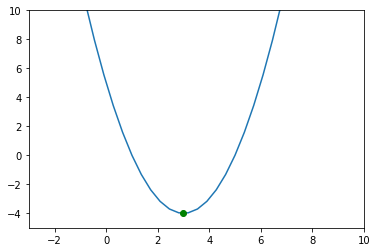

In [4]:
# plot the function
plt.plot(x, y)
plt.xlim(-3, 10)
plt.ylim(-5, 10)
plt.plot(3, -4, 'go')

# $\Delta$ 2. Minimizing a quadratic equation using Gradient Descent


When the function is as simple as the quadratic function $f(x) = x^2 − 6x + 5$, we can find the optimal solution to $x$ by solving the equation $f'(x)=0$ analytically. We say these functions have closed-form solutions.

However, in the world of machine learning, most of the functions that we want to optimize are high dimensional (with a lot of variables) and very complicated. Therefore, we need a more generic solution that can help us find some optimal (usually only local optimal) solution.

Gradient Descent is one of those generic soultions to find the local minimum of a given function - it's an iterative **optimization algorithm** based on the steepest descent. To find the local minimum, you start at a random point, and move into the direction of steepest descent relative to the gradient, i.e. into the direction that goes down (hence, **descent**). 

In this example, let's suppose we start at $x = 15$. 

We then calculate the gradient, $f'(x) = 2x - 6$ (this should be your answer to **Practice 1.1** above), at this point is $2 \times 15 - 6 = 24$. We update our estimation of the optimal $x$ by 

$$\begin{align}
x'=x-\alpha f'(x)\\
\end{align}$$

$\alpha$ is the **step size** (or called learning rate) of our optimization process, it controls how aggressive we are when updating the value of $x$. It has to be chosen carefully, as a value too small will result in a long computation time, while a value too large will not give you the right result (by overshooting) or even fail to converge.

In this example, we'll set the step size to 0.01, which means we'll subtract $24 \times 0.01$ from 15, which is $14.76$. This is now our new temporary local minimum: We continue this method until we either don't see a change after we subtracted the gradient * step size, or until we've completed a pre-set number of iterations. 

The algorithm stops when the values between the new and the temporary minimum do not differ by more than 0.001 - if we need more precision, we can decrease this value. According to gradient descent, the local minimum occurs at $3.5$, which is not too far off from the true local minimum.

In [5]:
### Initialization

old_min = 0
temp_min = 15
step_size = 0.001  # small step size
precision = 0.001

### $\Omega$ Practice 2.1. Implement updating $x'=x-\alpha f'(x)$

In [6]:
def update_x(gradient, step_size, current_x):
    # TODO: implement the logic of updating x using the given step_size and gradient x'=x-\alphra * f'(x)
    # return the new x
    return current_x - step_size * gradient
    

### $\Omega$ Practice 2.2. Implement the iterative gradient descent optimization process

In [7]:
### Gradient Updates

mins = [] # a list to keep track of minimum
cost = [] # a list to keep track of cost function

while abs(temp_min - old_min) > precision:
    old_min = temp_min 
    gradient = f_derivative(old_min)  # calculate gradient
    
    # make update to get the newly estimated best x so far
    temp_min = update_x(step_size=step_size, gradient=gradient, current_x=old_min) 
    
    cost.append((3-temp_min)**2)      # append squared error to  
    mins.append(temp_min)             # append minium to list


print("Local minimum occurs at {}.".format(round(temp_min,2))) 

Local minimum occurs at 3.5.


### Plot the graident update steps

We can visualize the gradient descent by plotting all temporary local minima on the curve. As you can see, the improvement decreases over time; at the end, the local minimum barely improves.


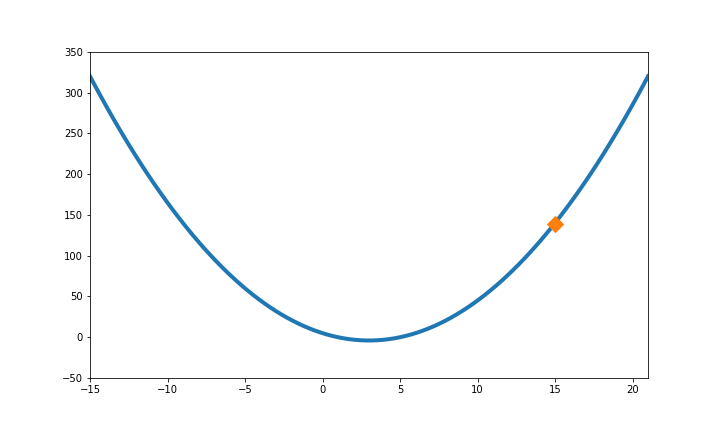
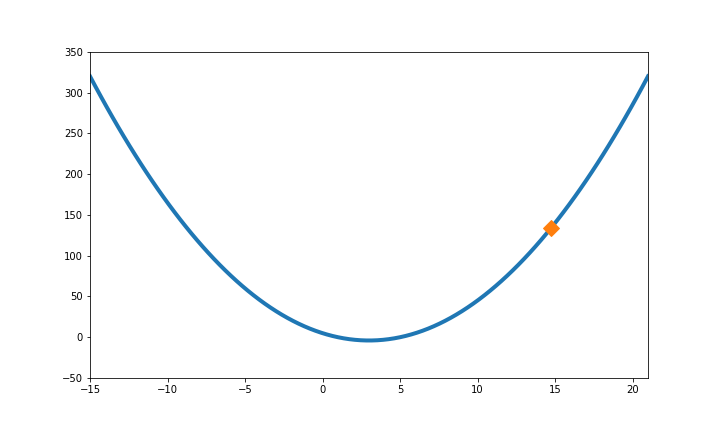
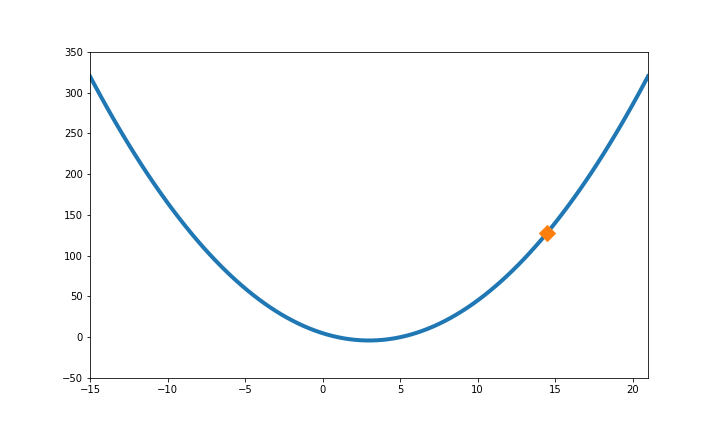
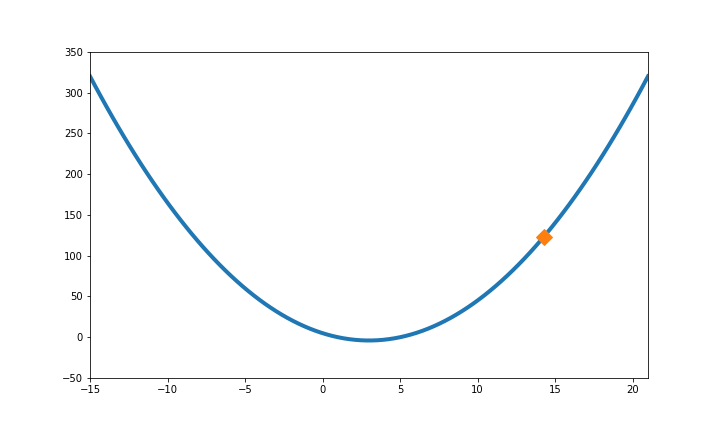
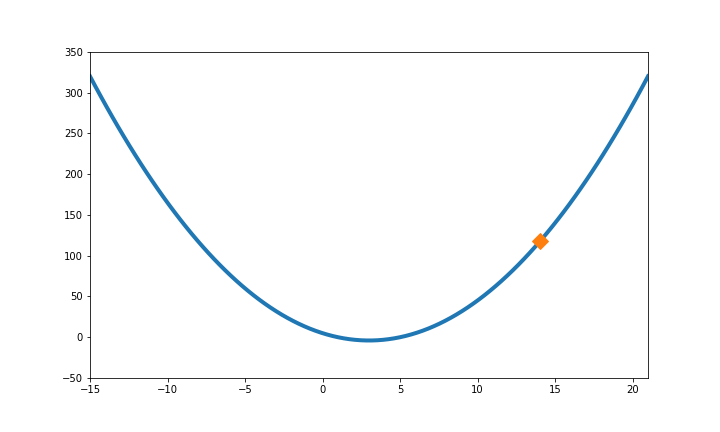
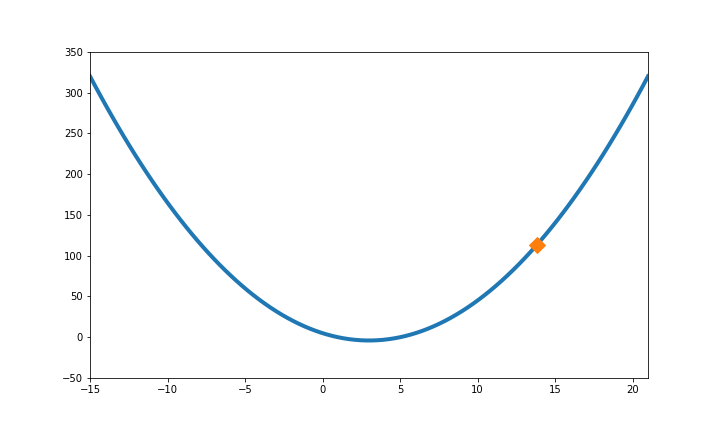
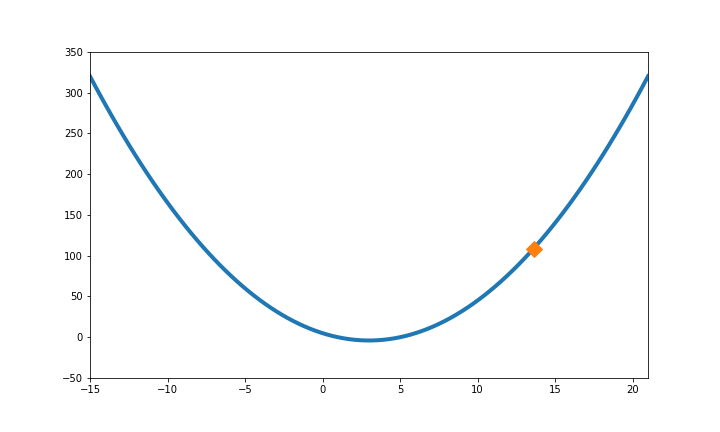
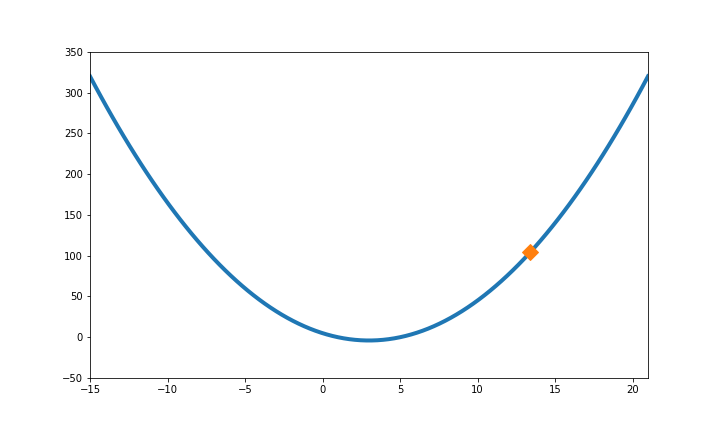
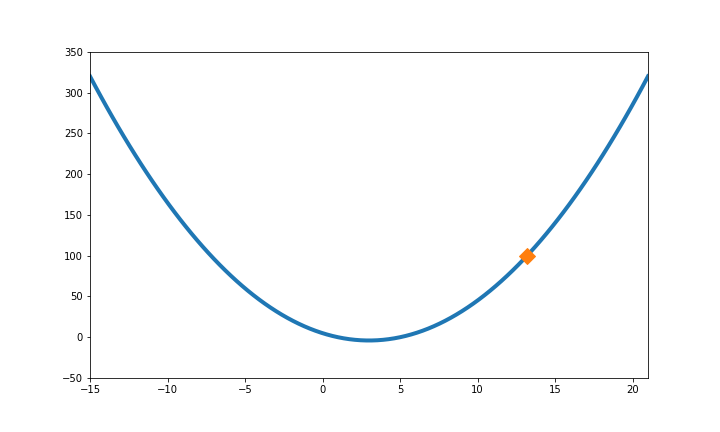
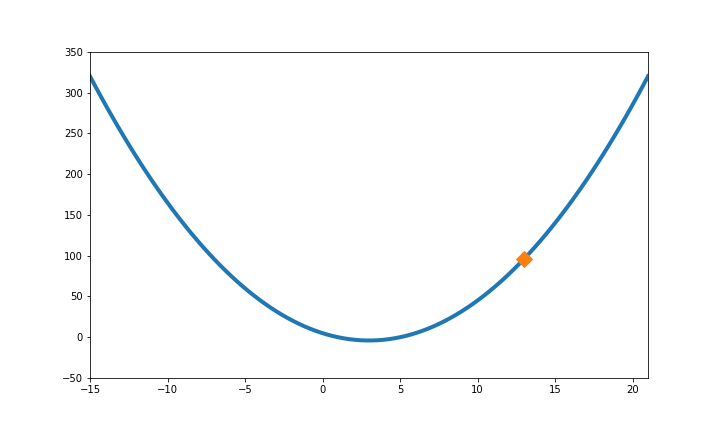
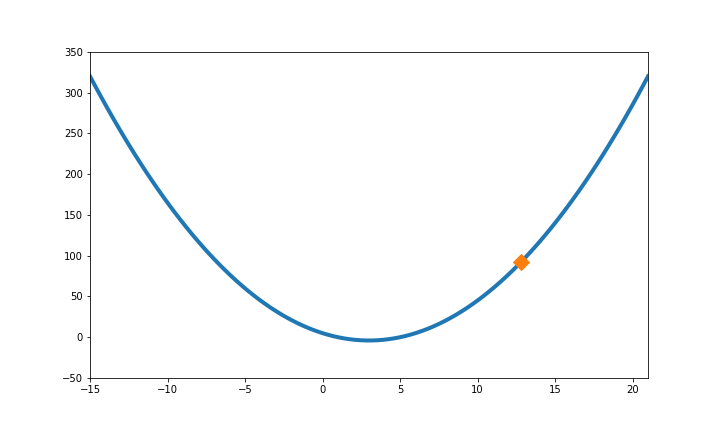
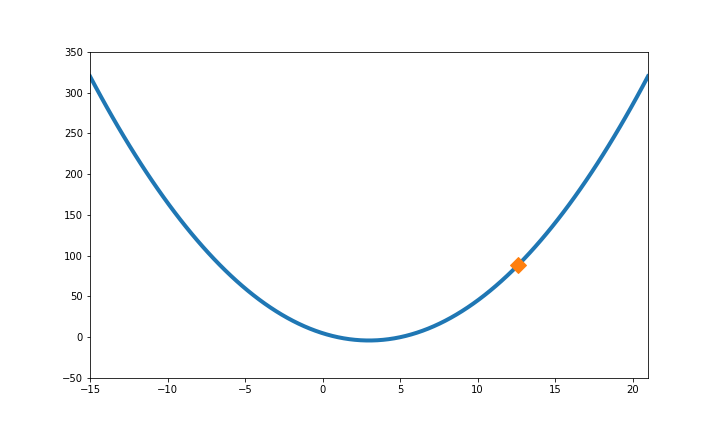
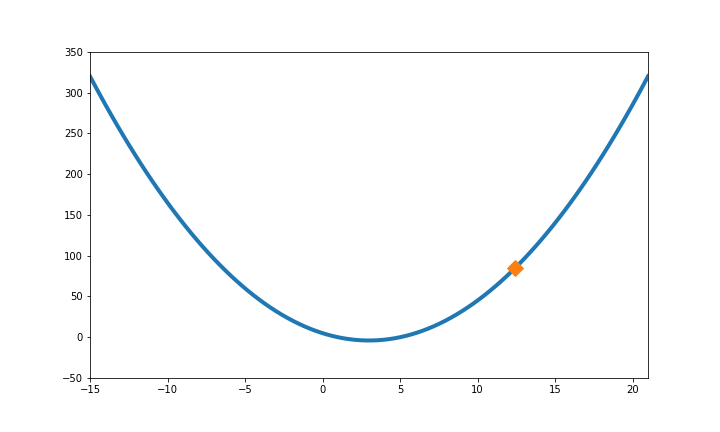
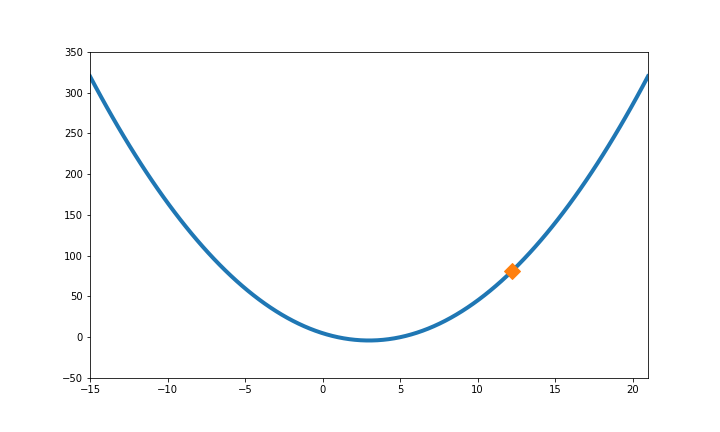
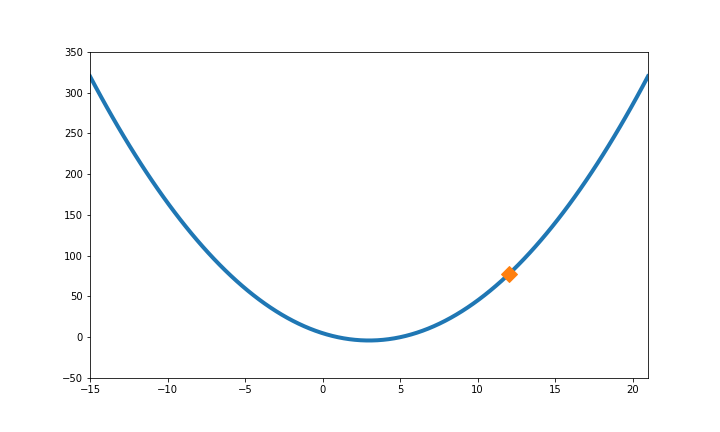
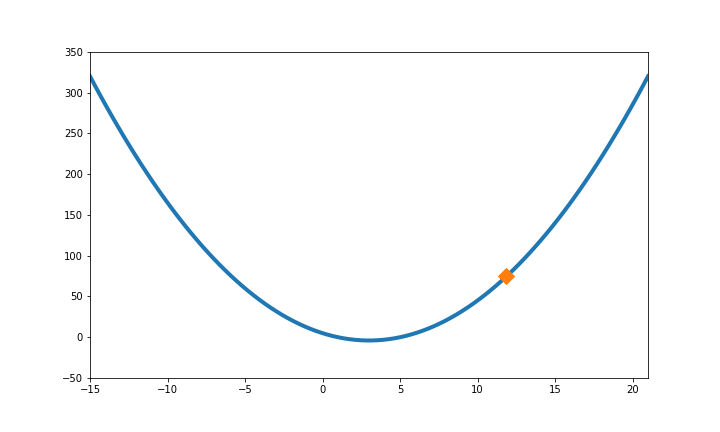
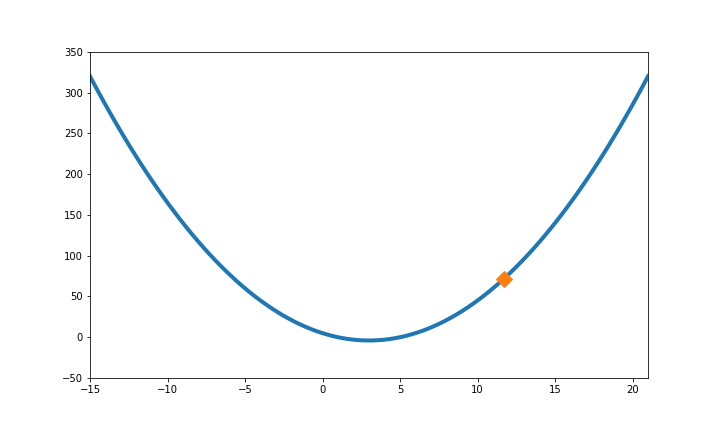
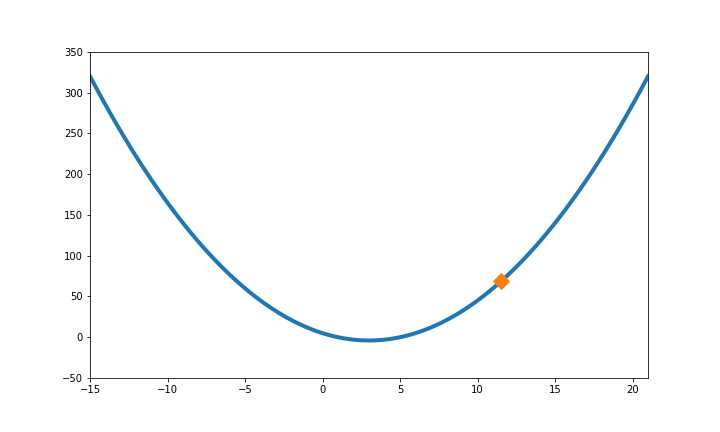
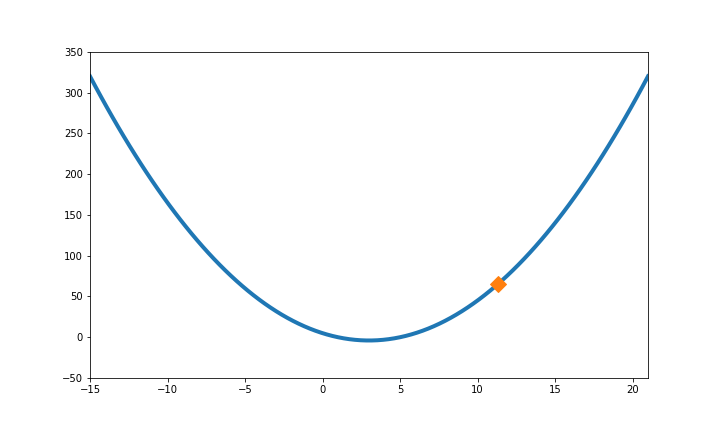
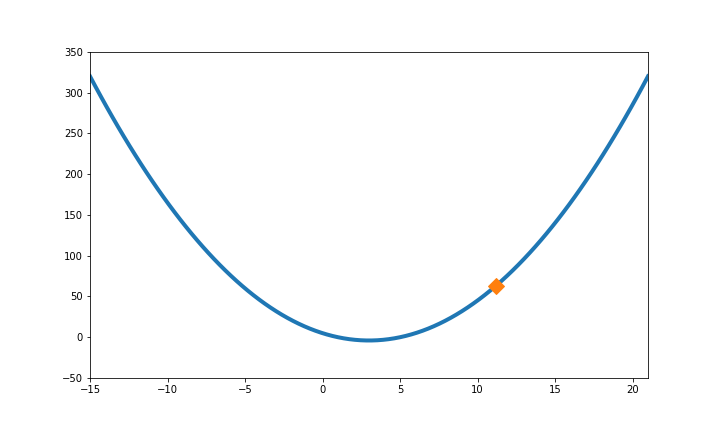
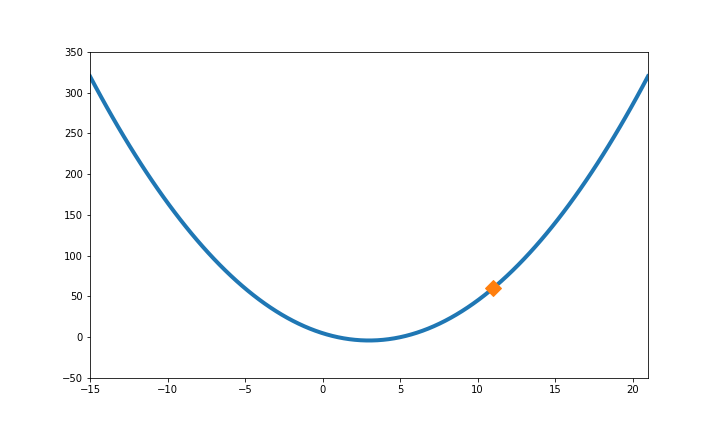
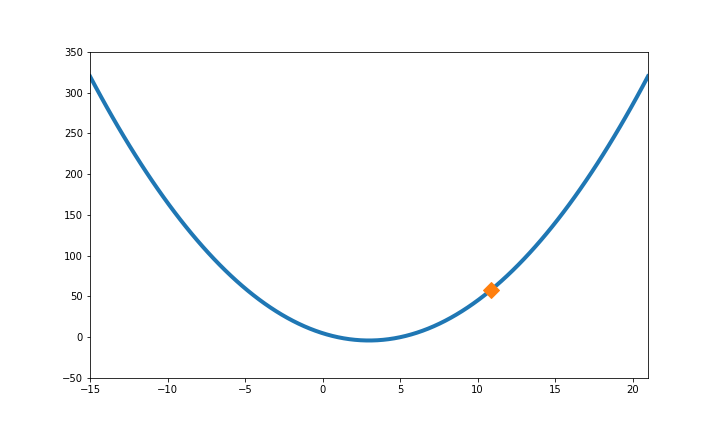
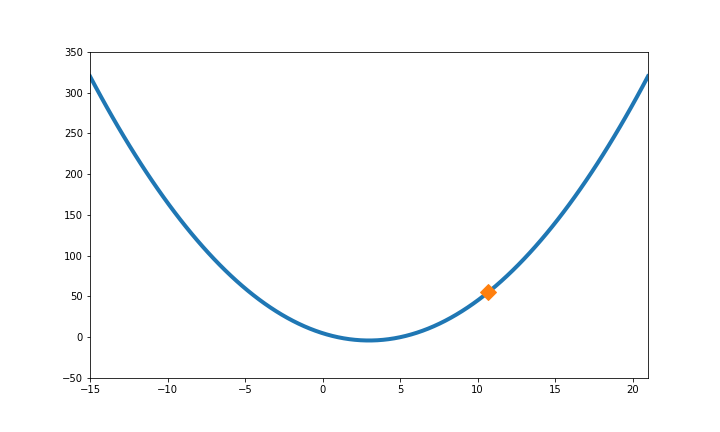
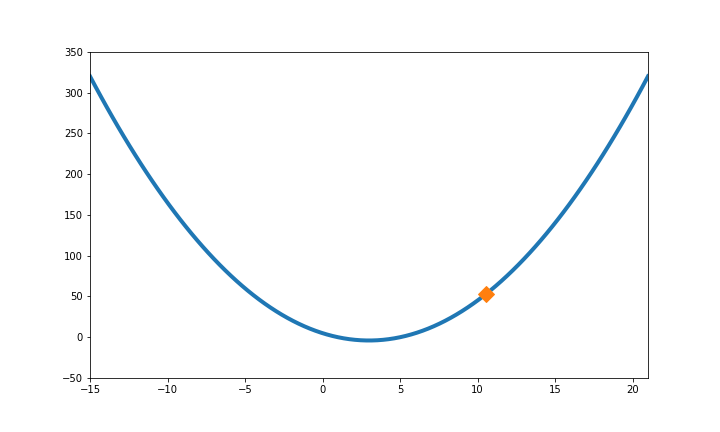
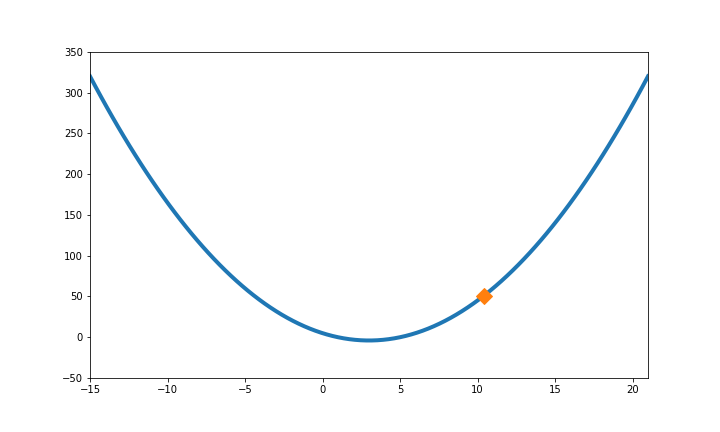
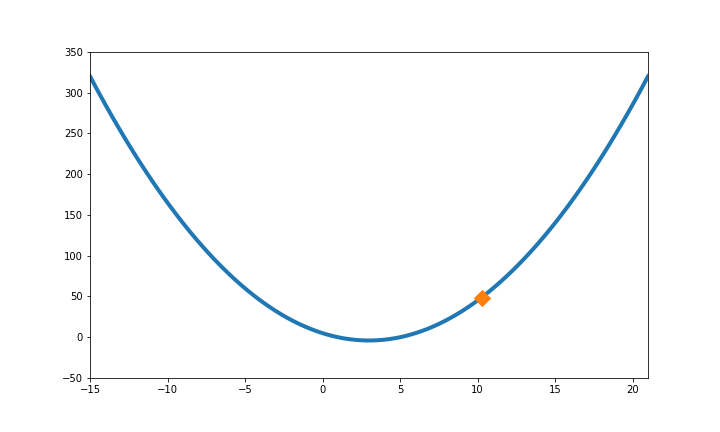
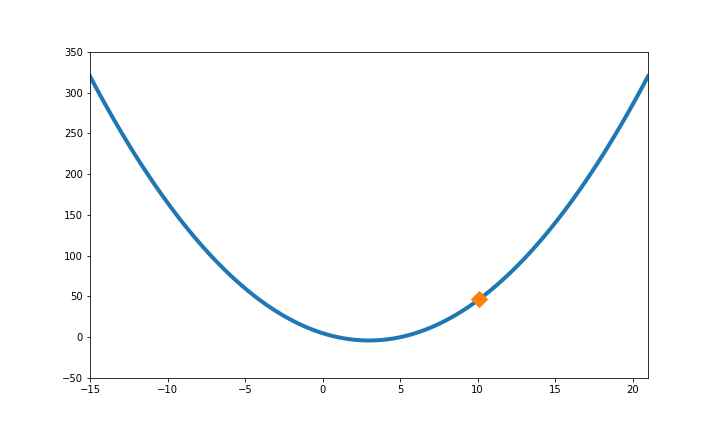
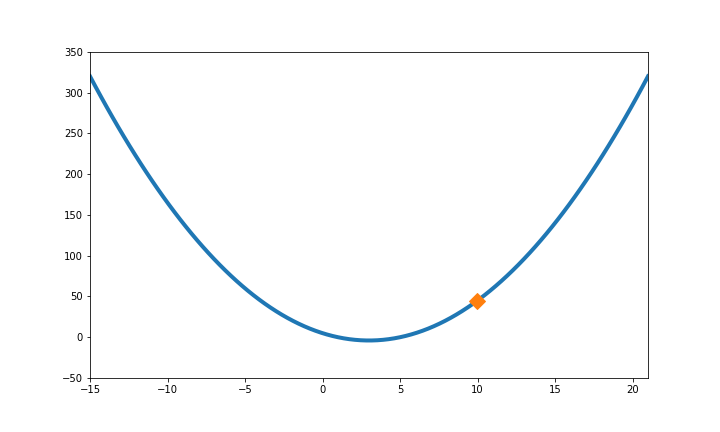
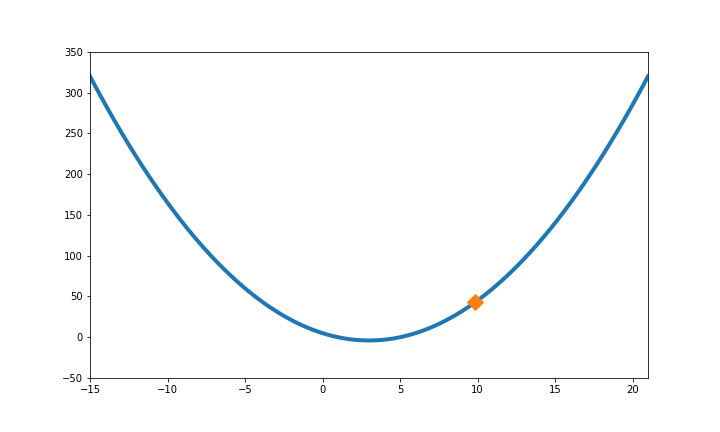
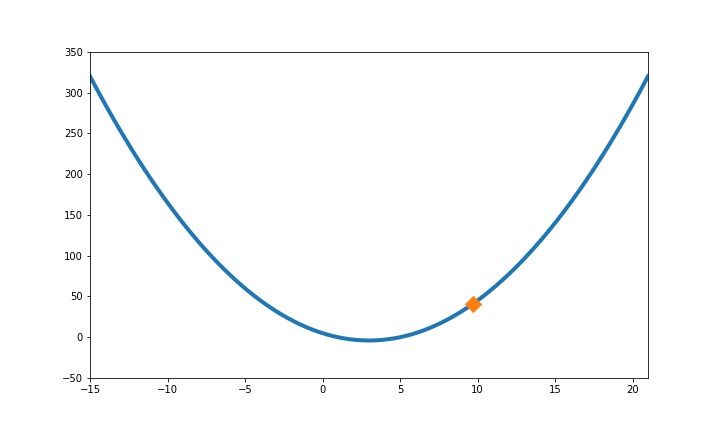
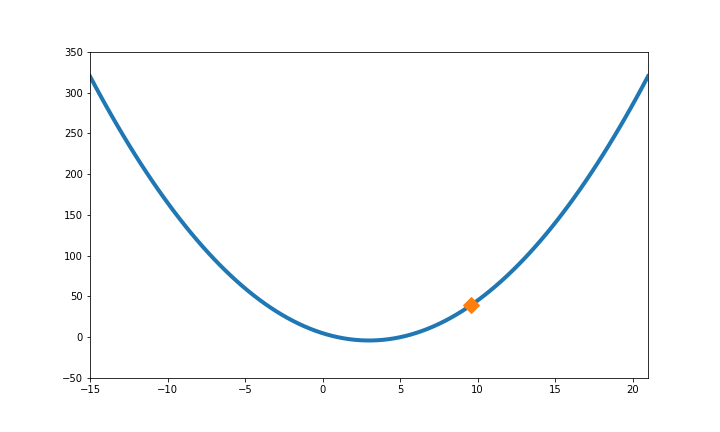
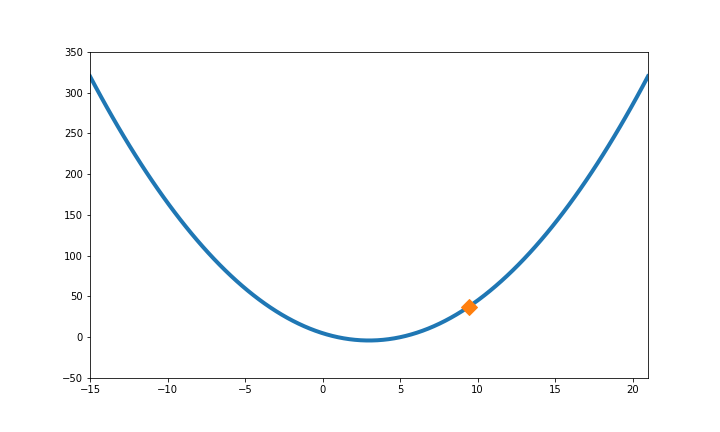
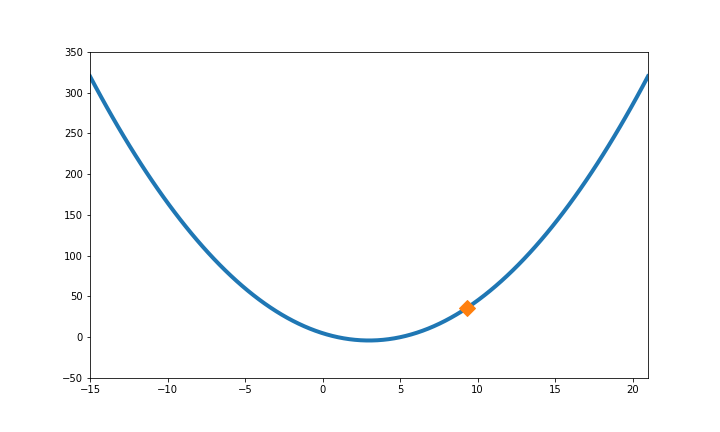
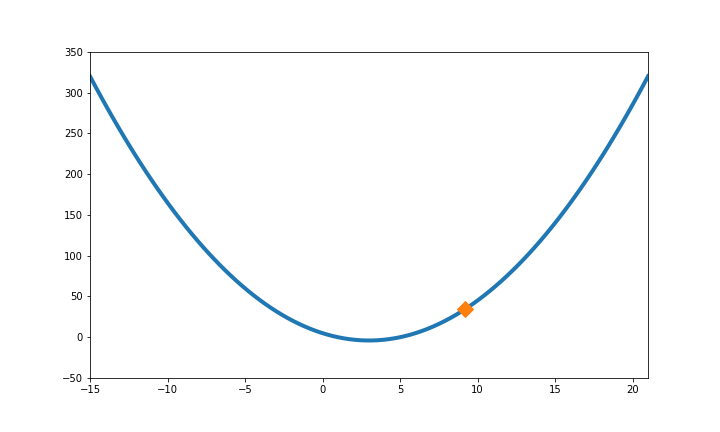
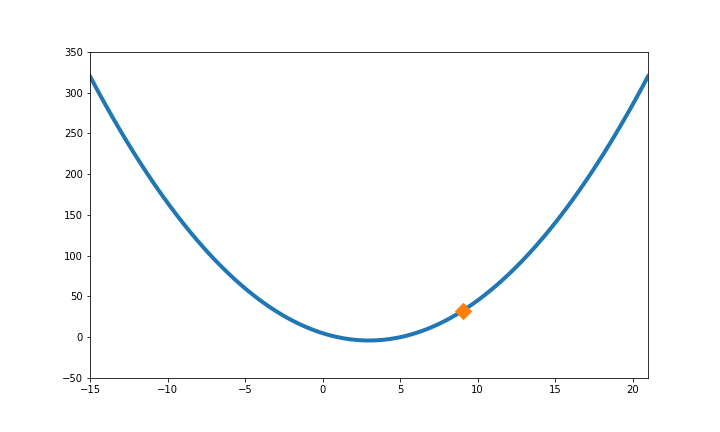
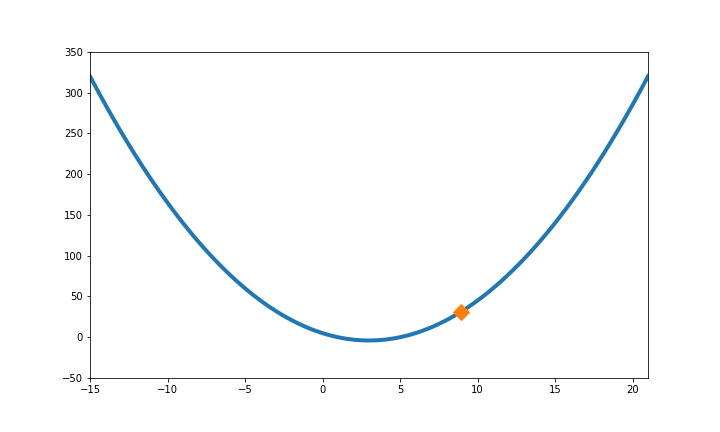
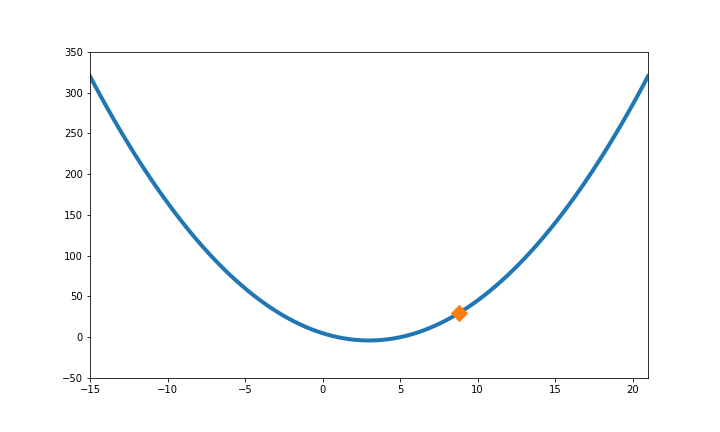
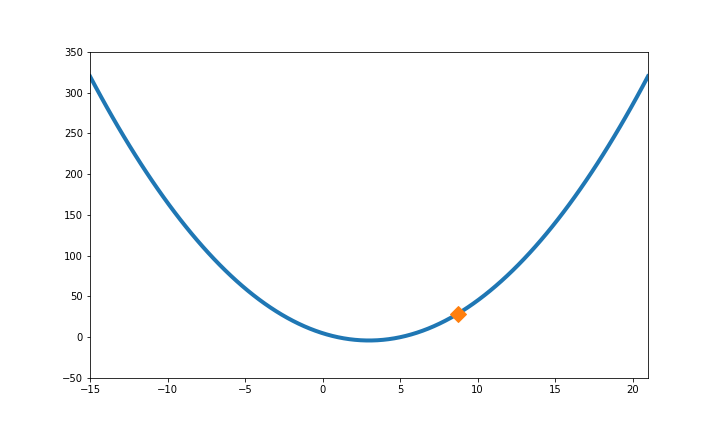
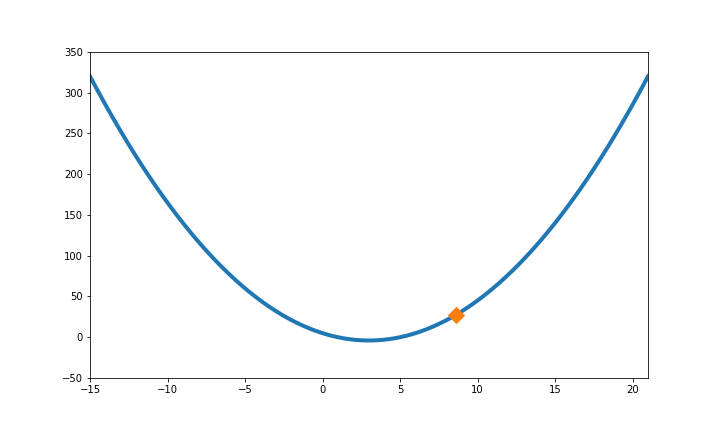
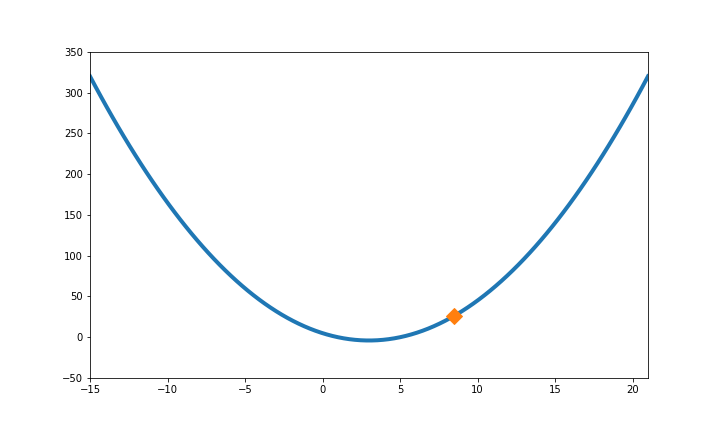
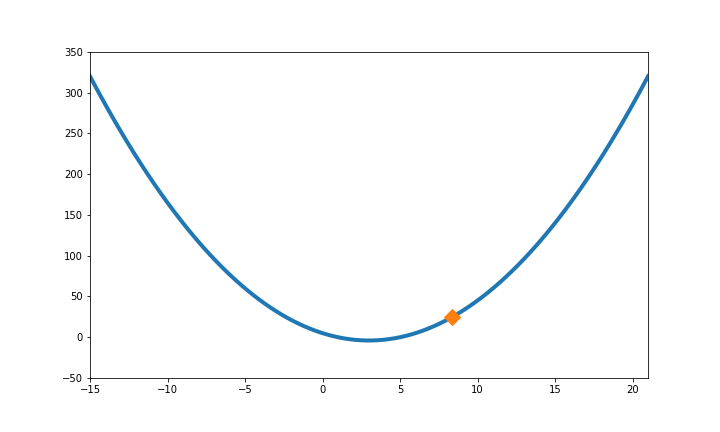
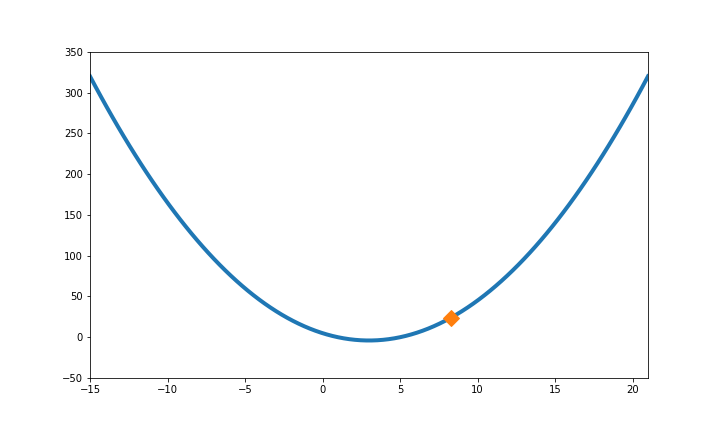
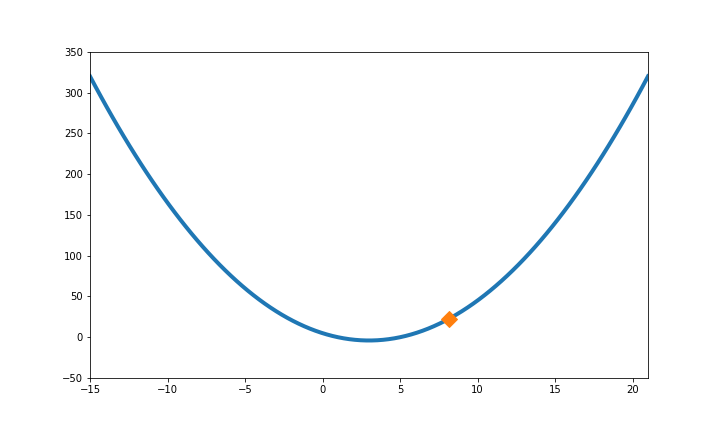
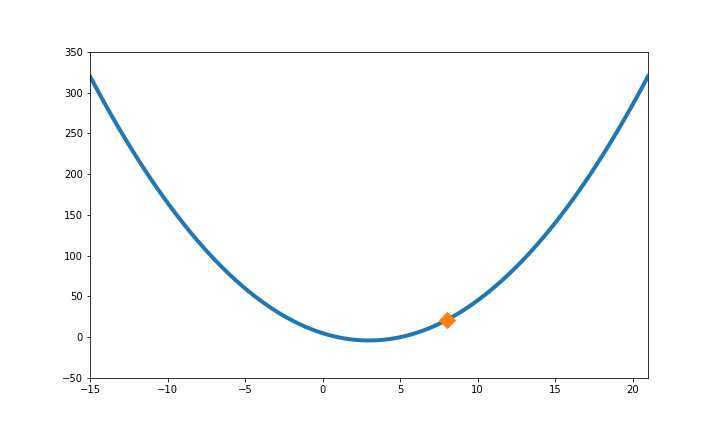
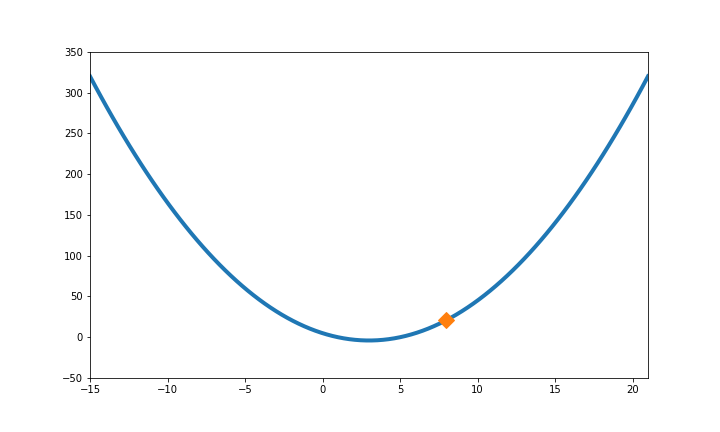
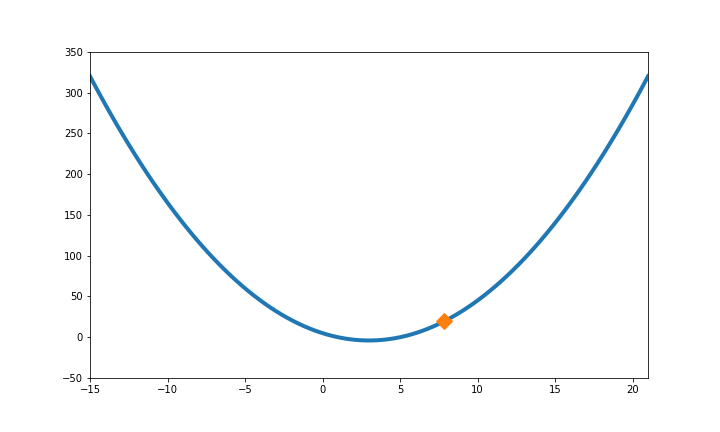
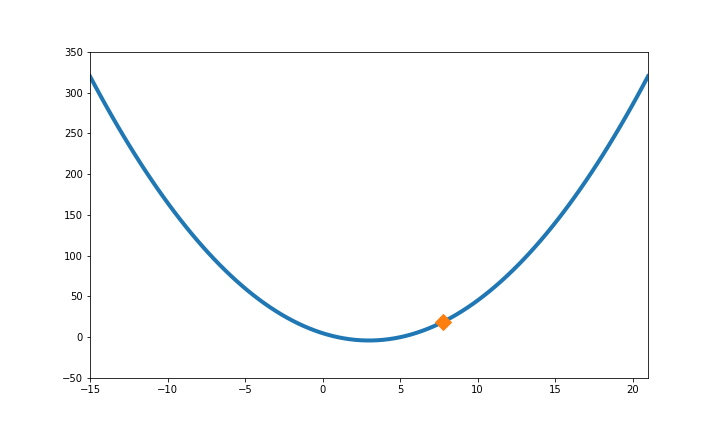
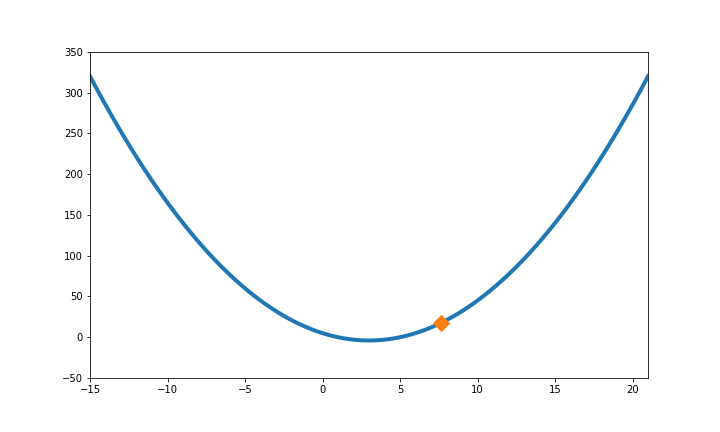
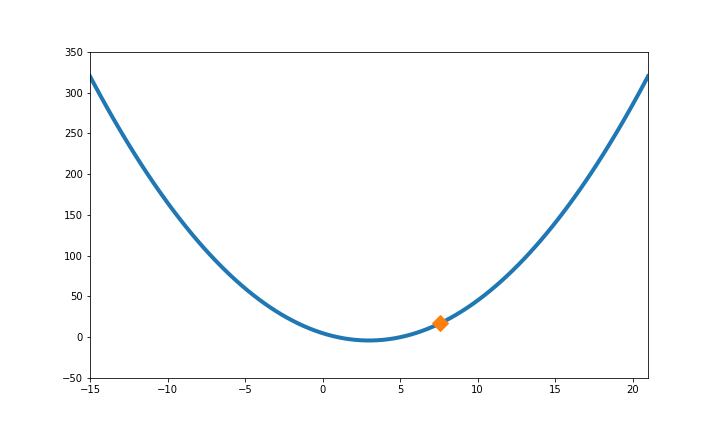
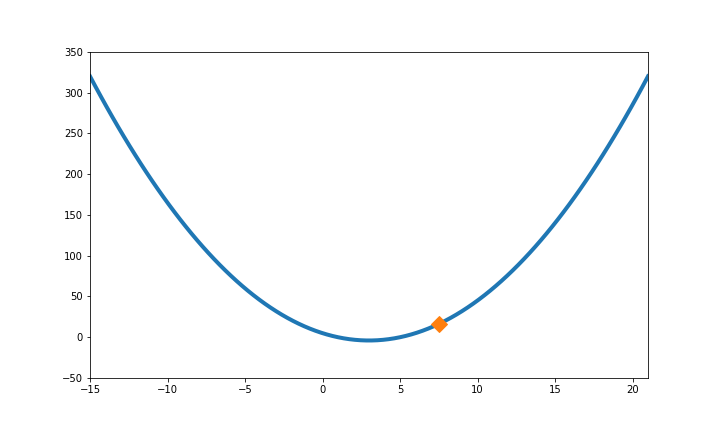
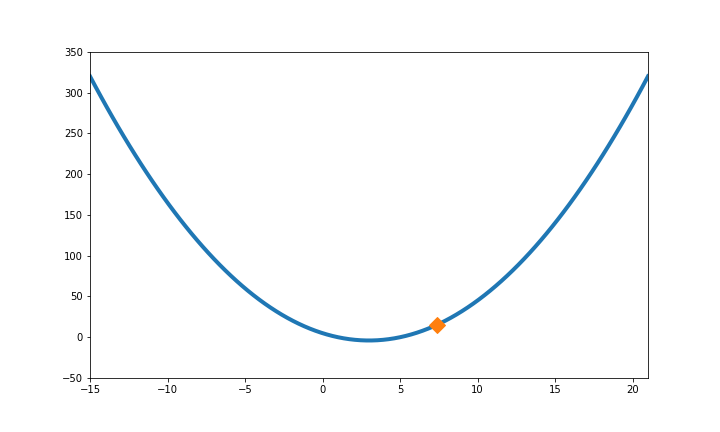
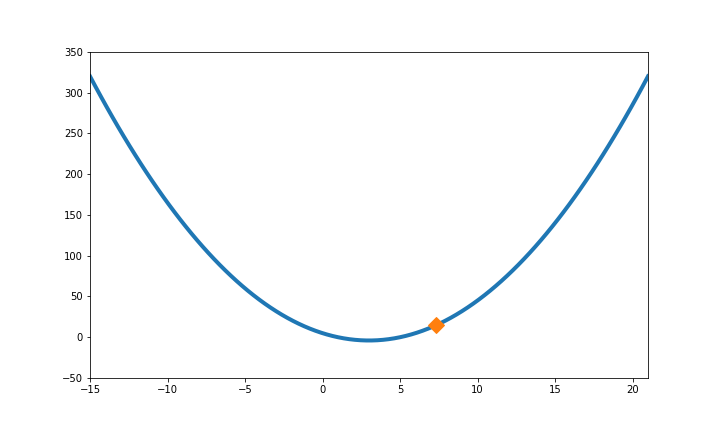
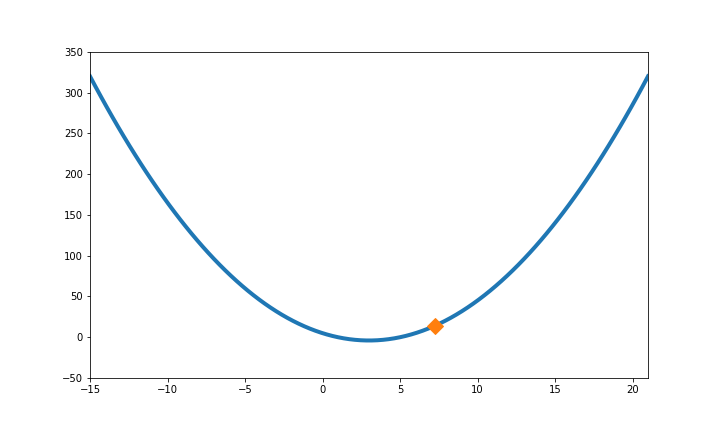
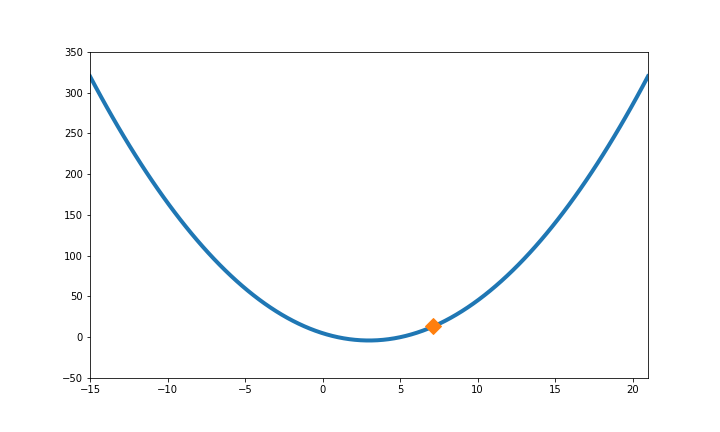
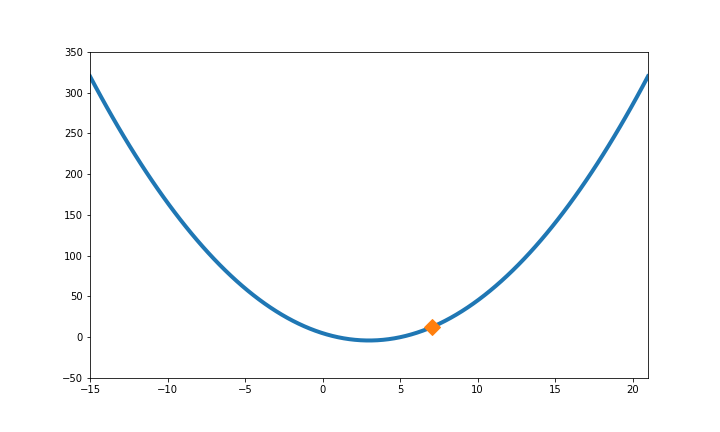
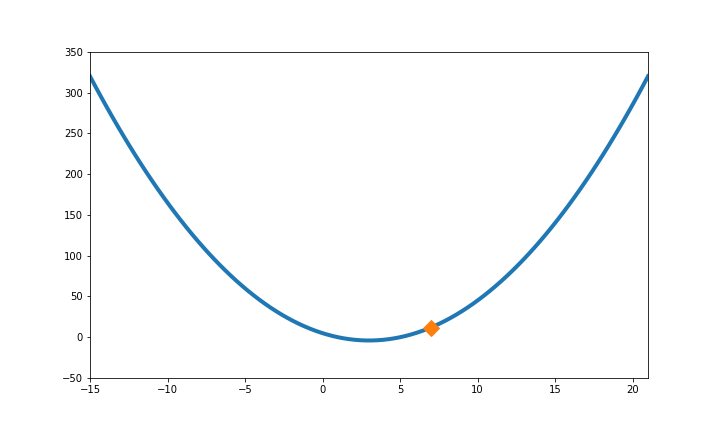
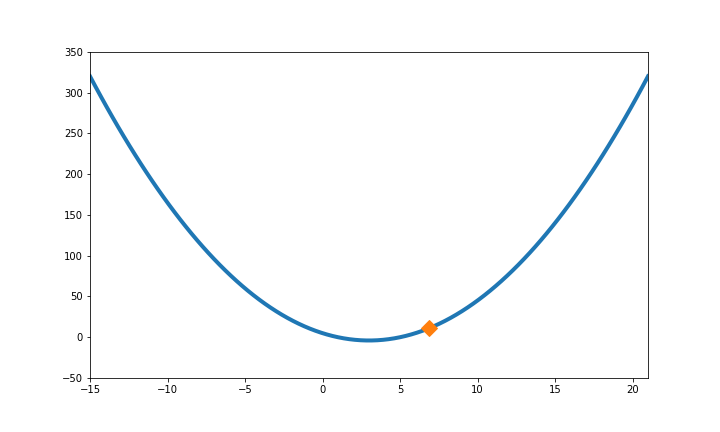
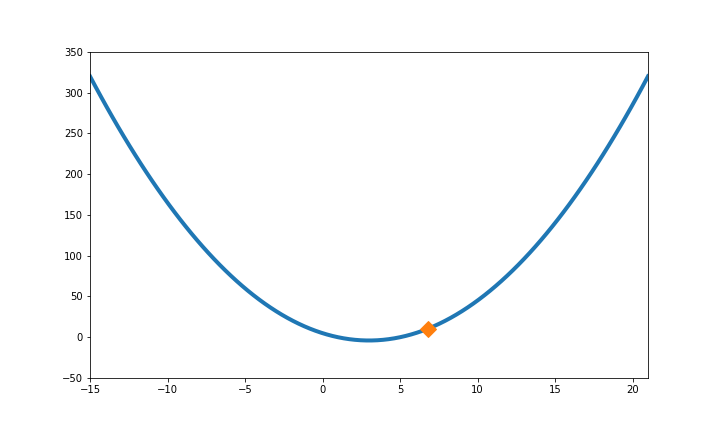
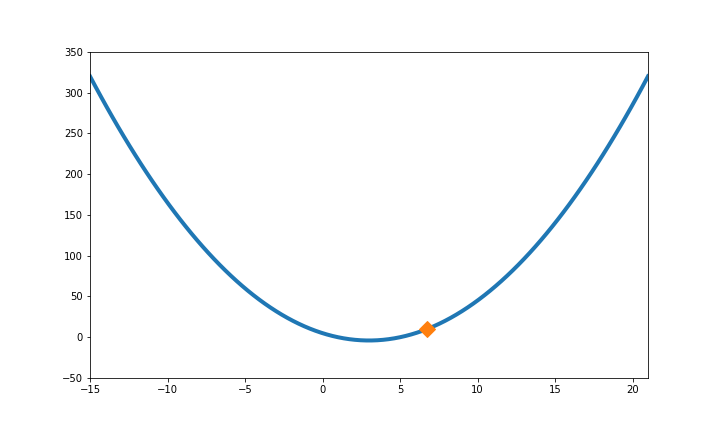
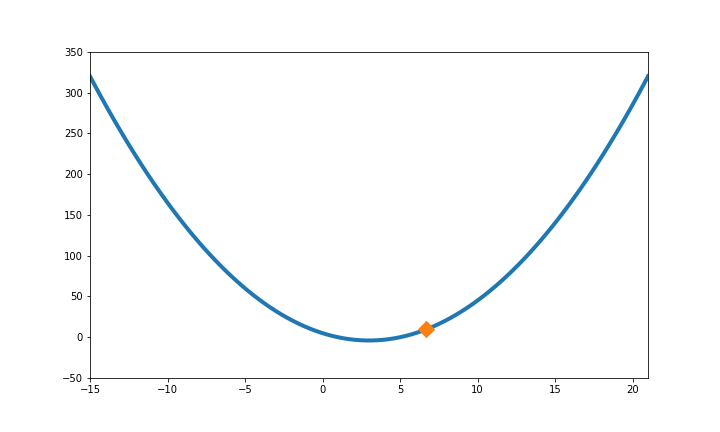
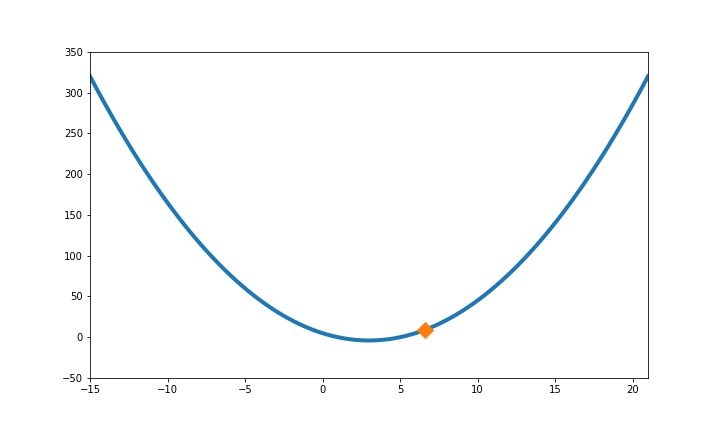
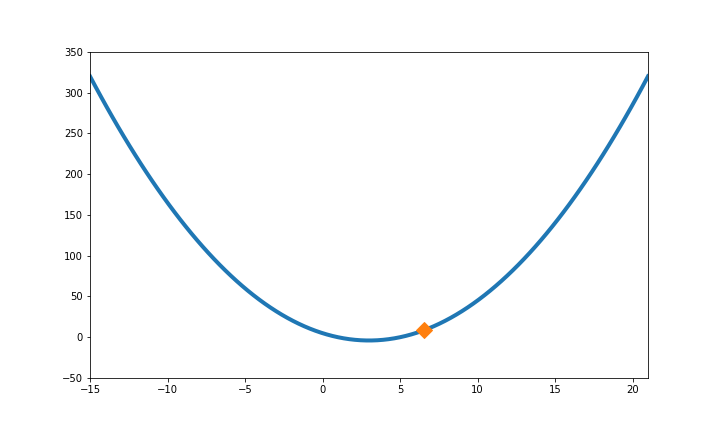
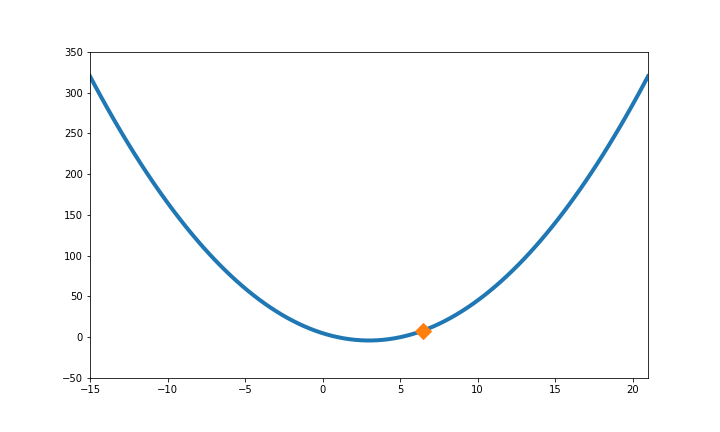
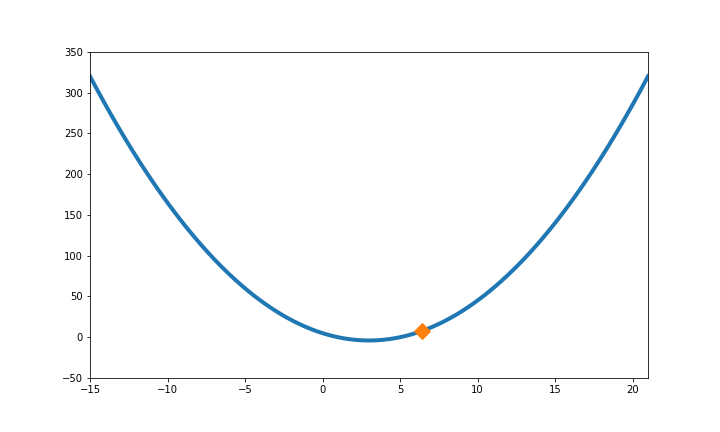
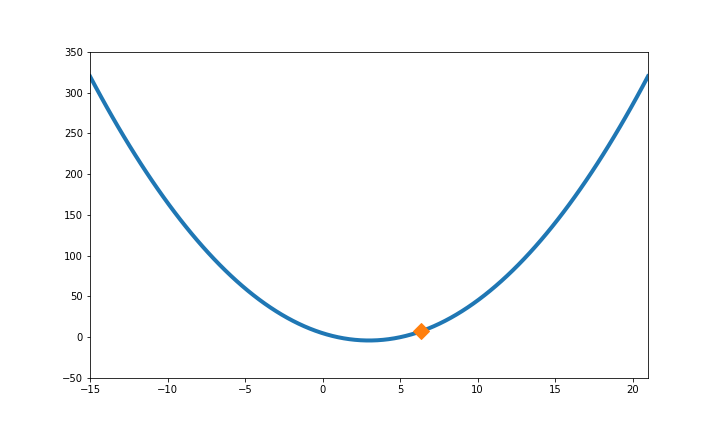
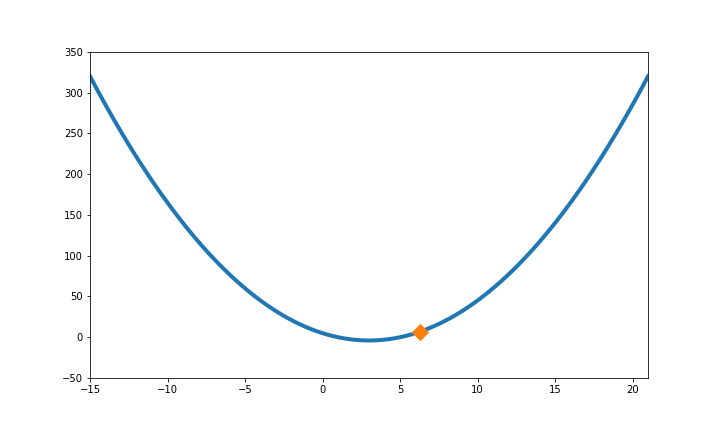
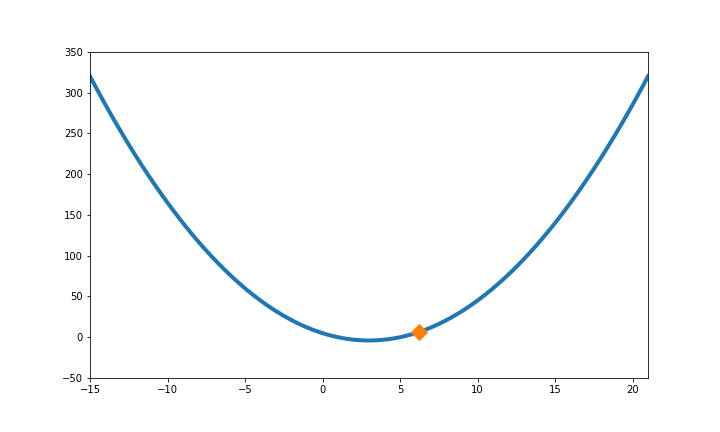
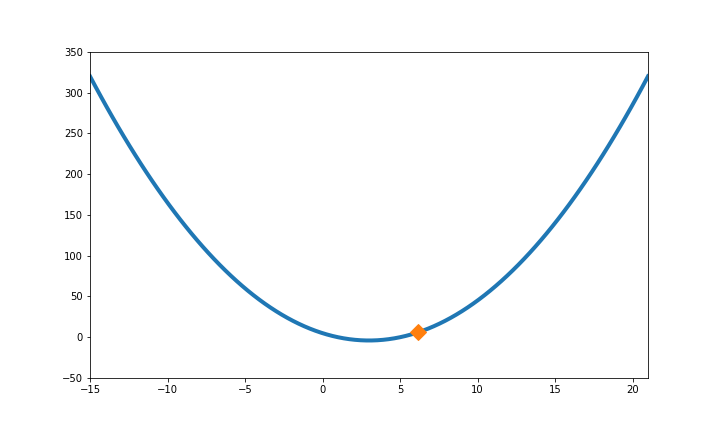
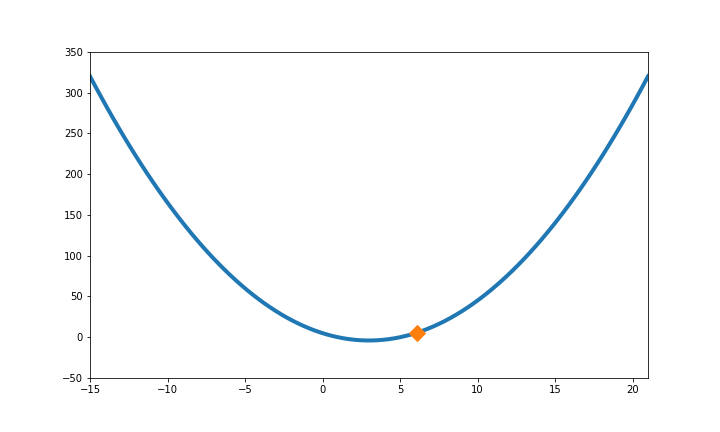
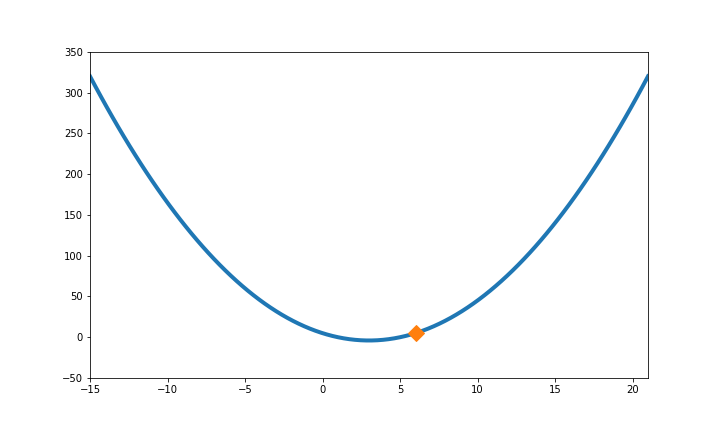
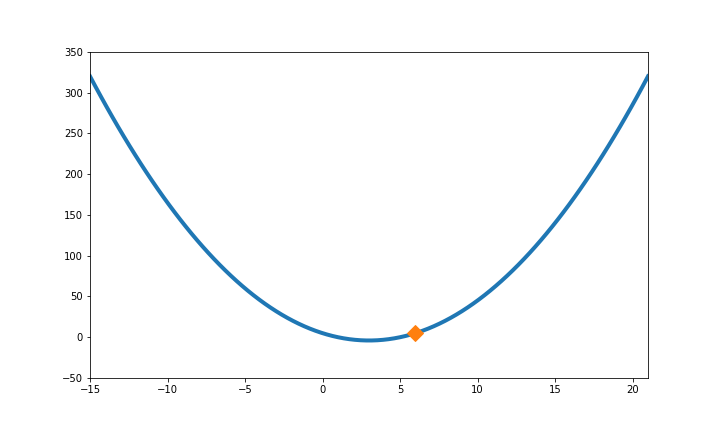
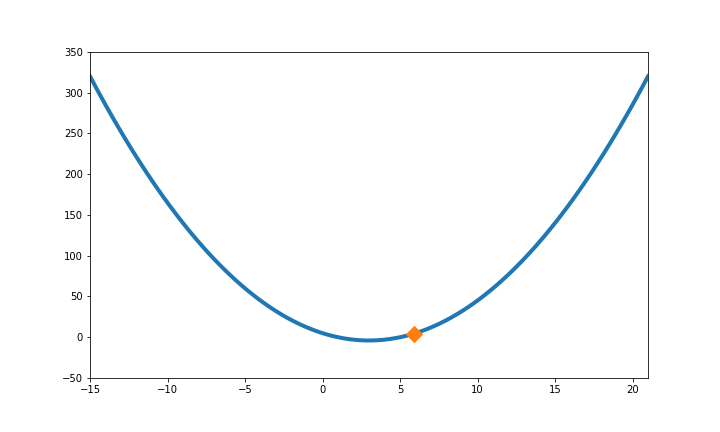
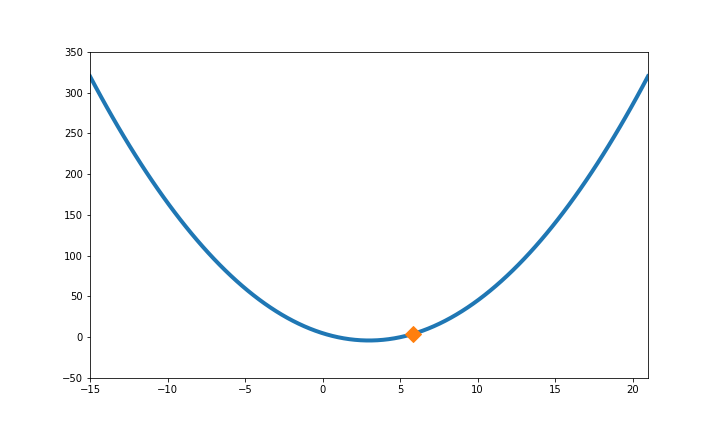
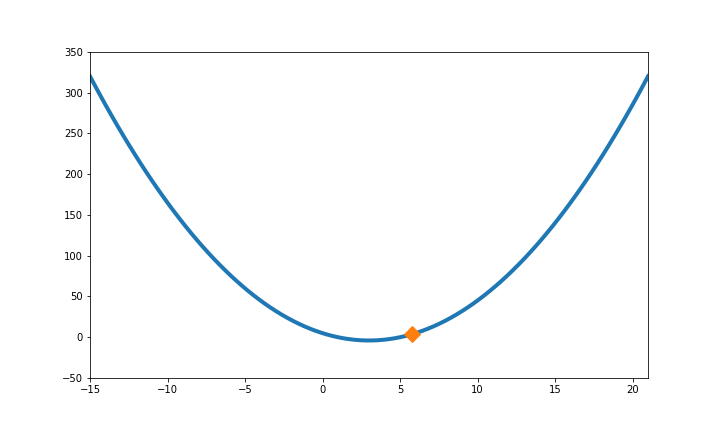
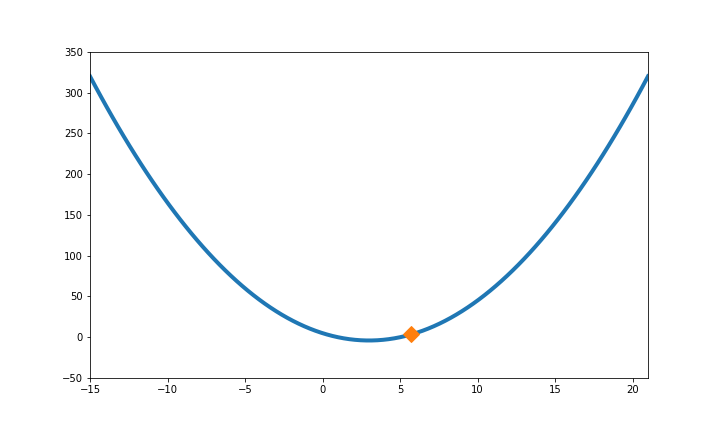
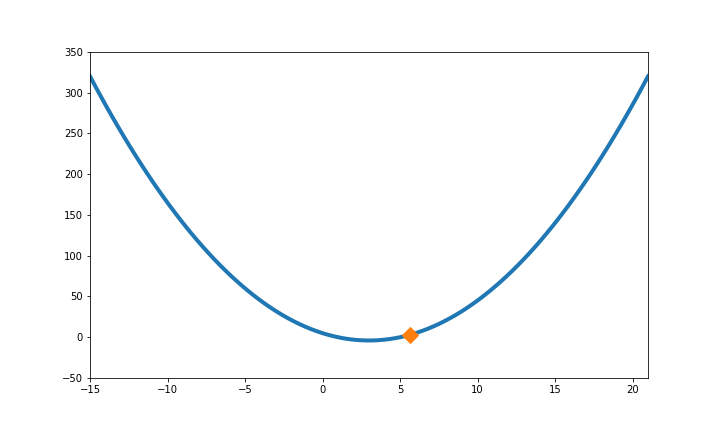
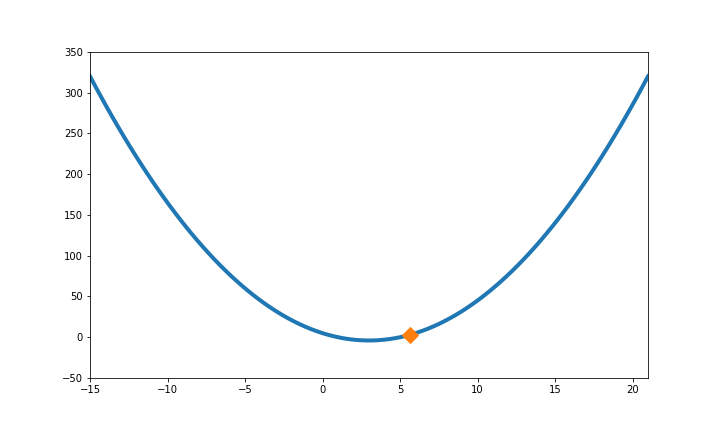
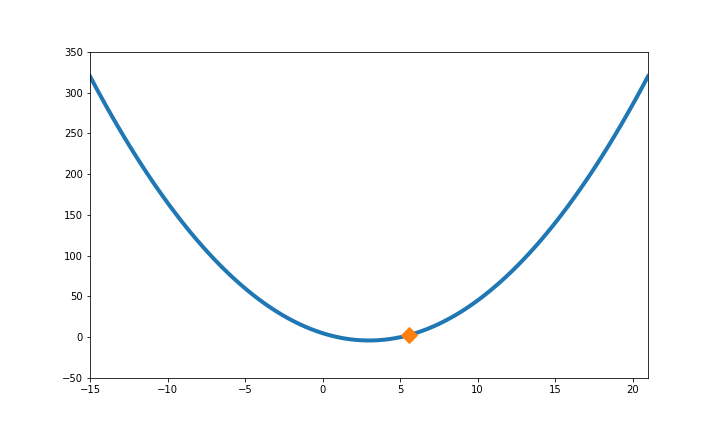
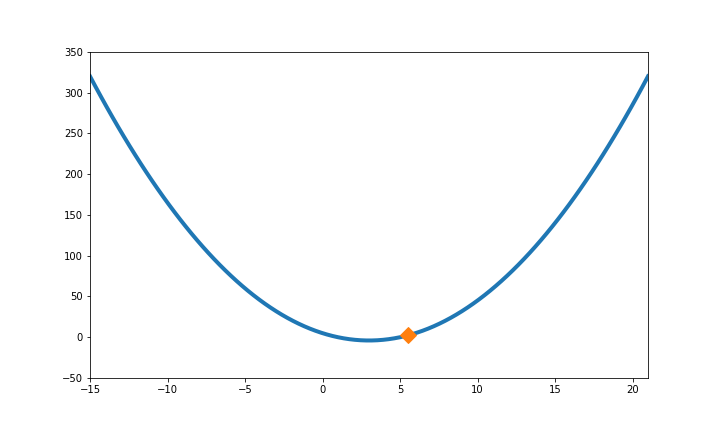
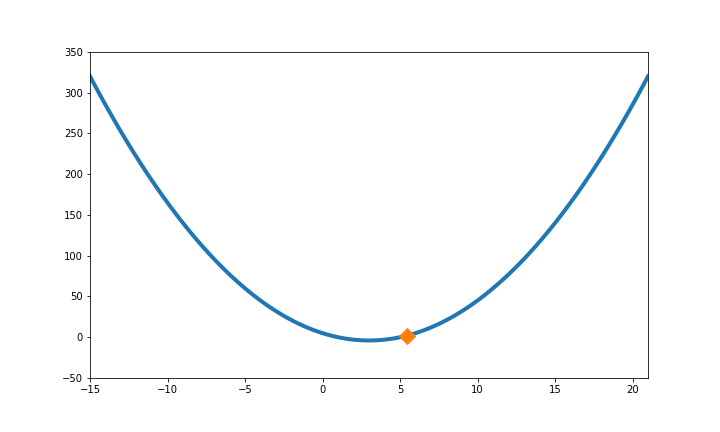
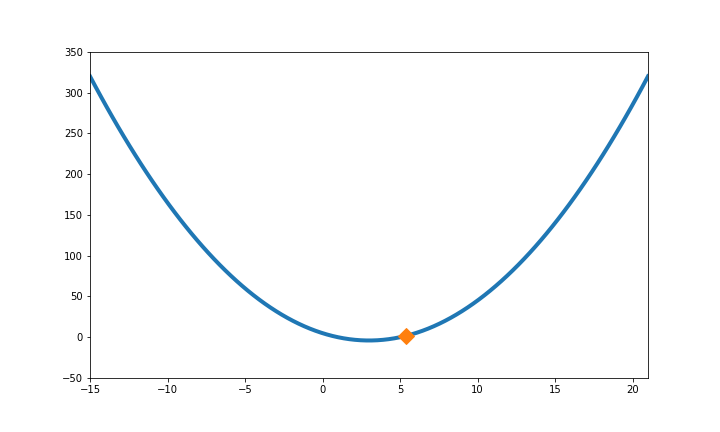
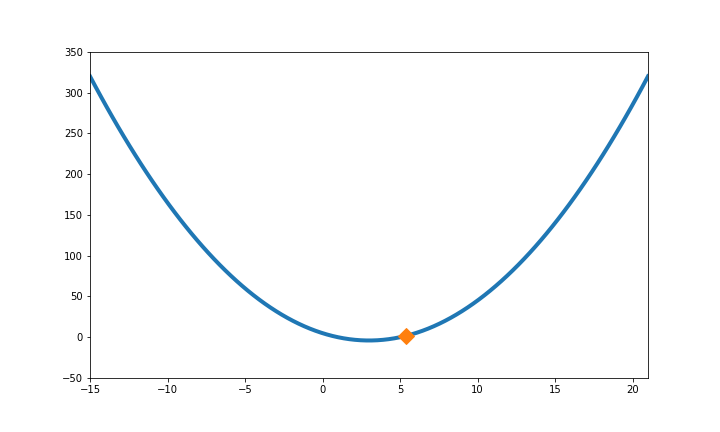
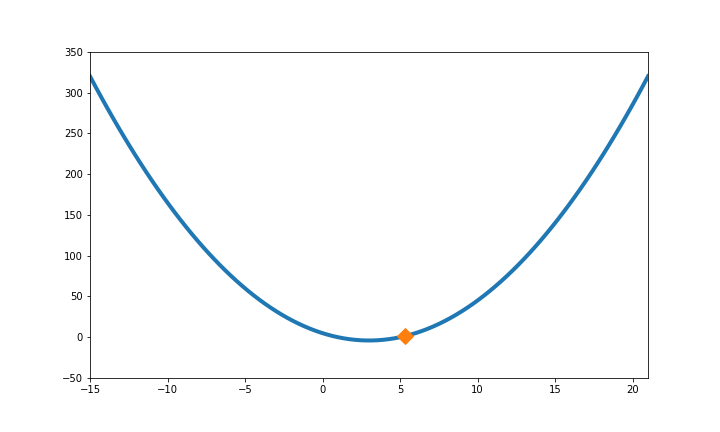
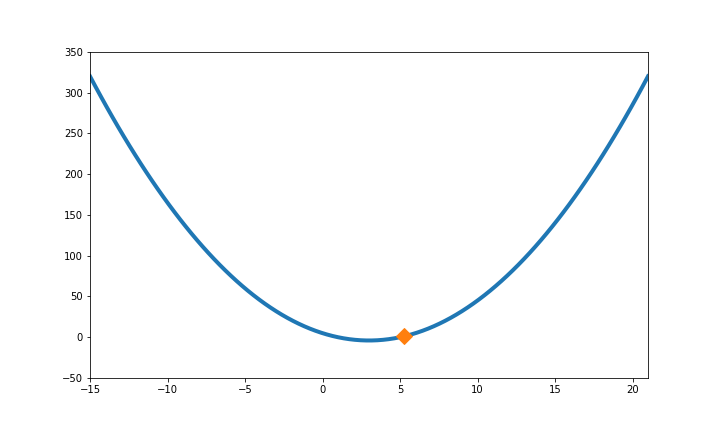
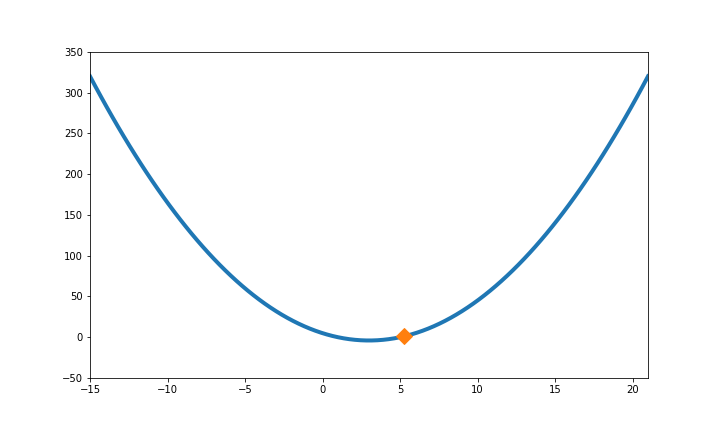
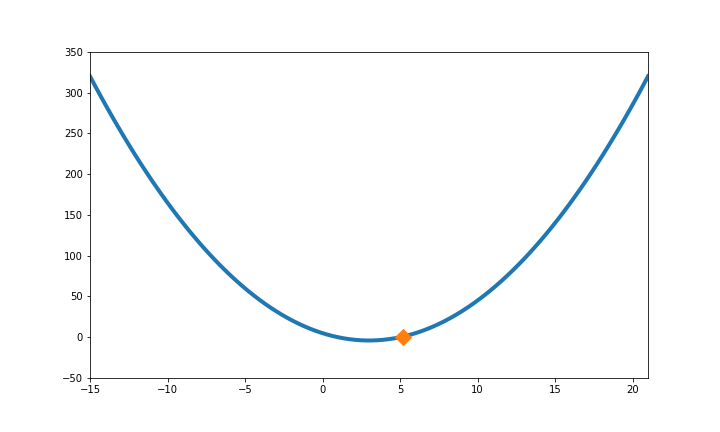
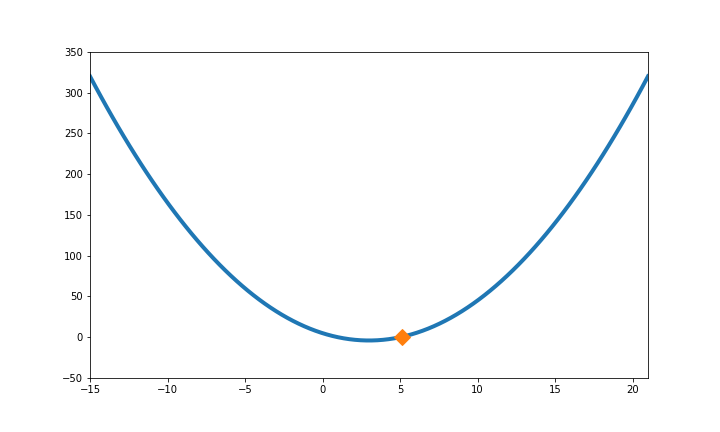
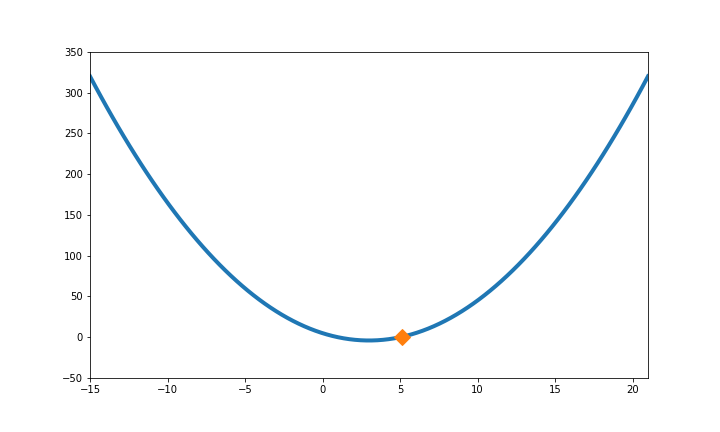
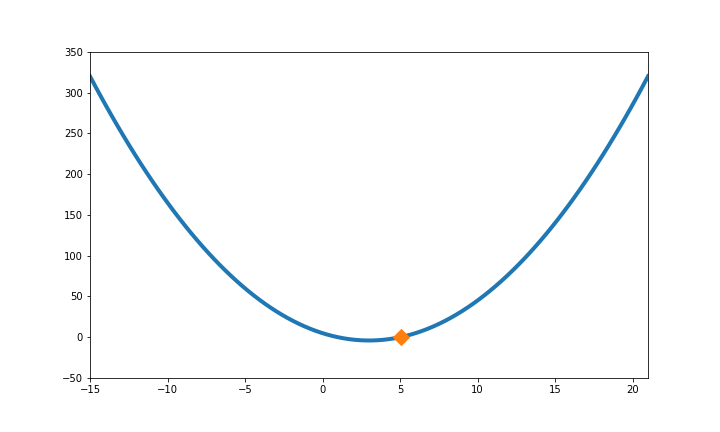
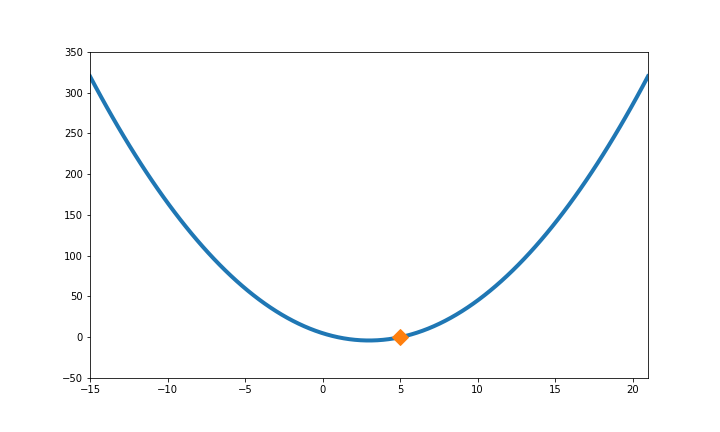
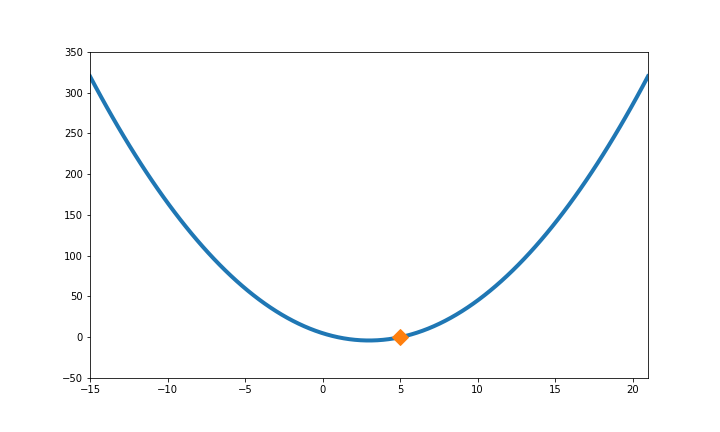
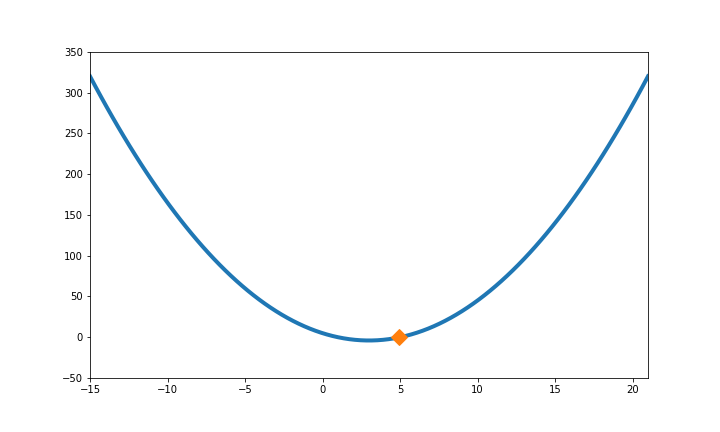
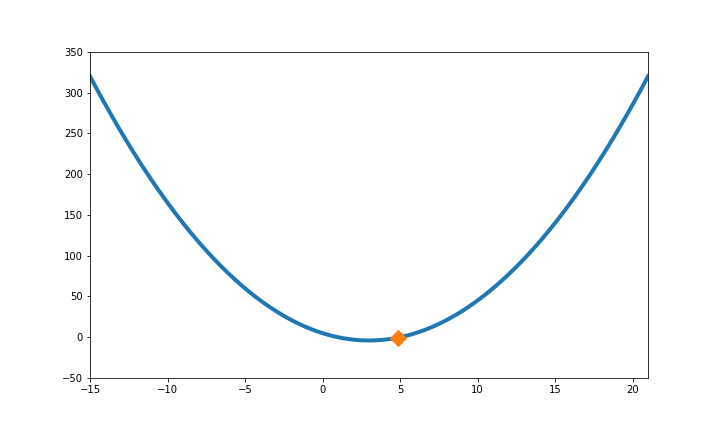
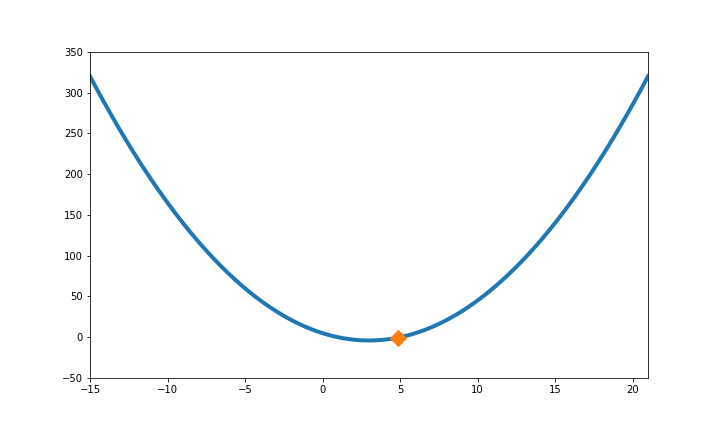
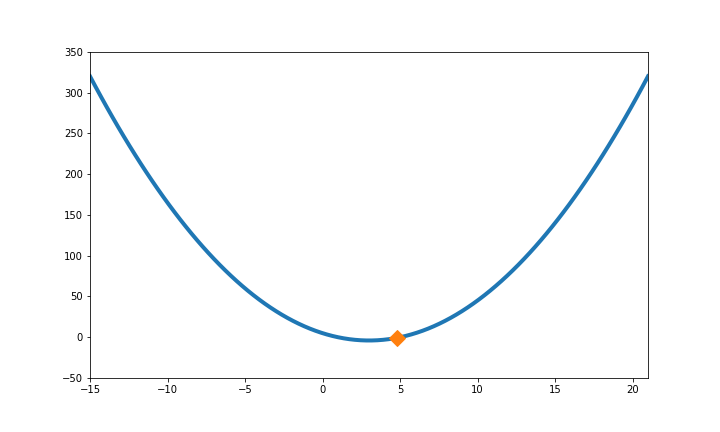
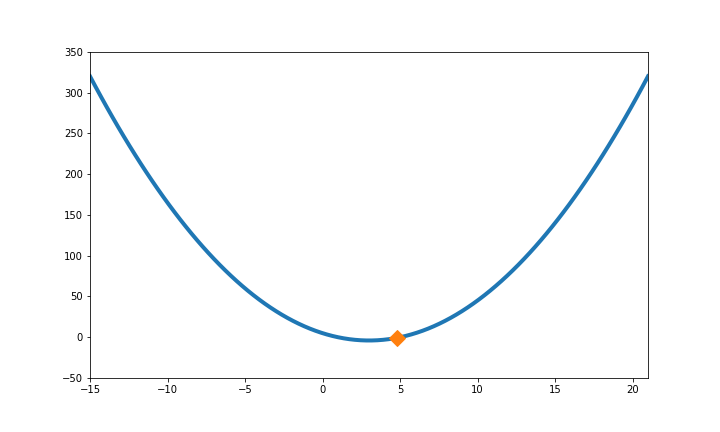
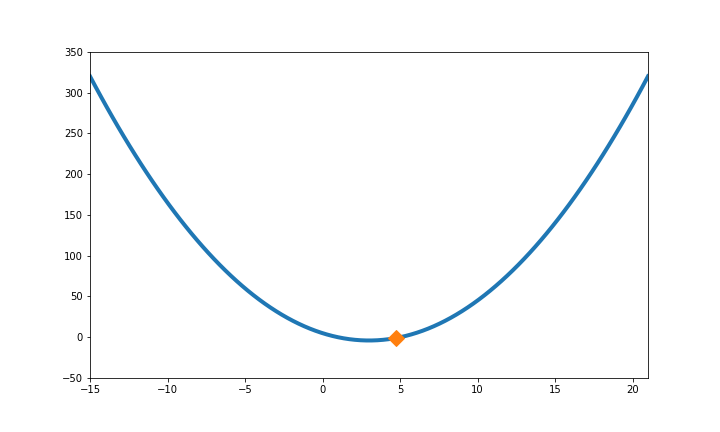
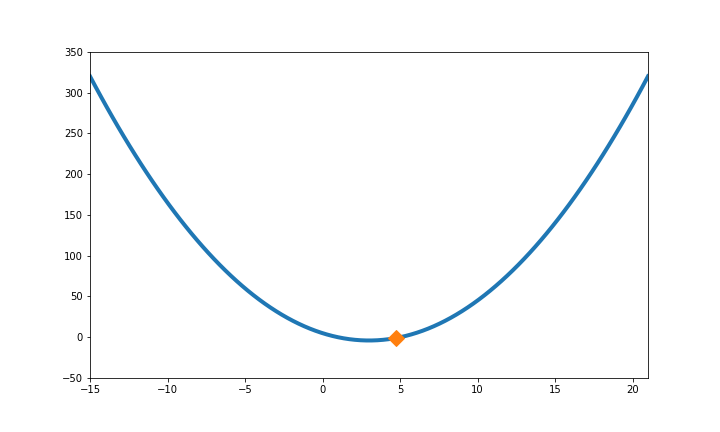
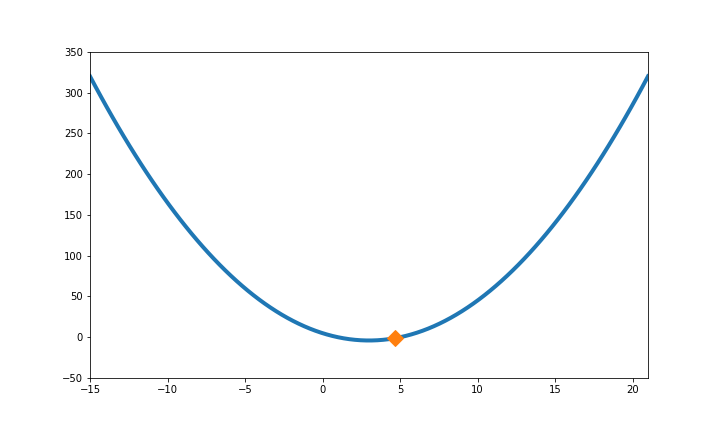
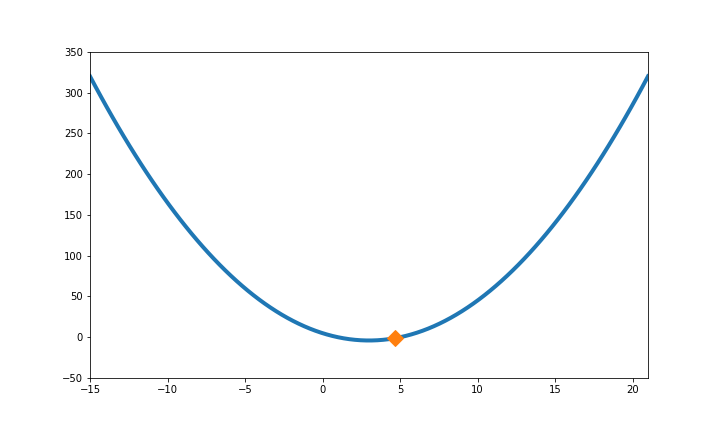
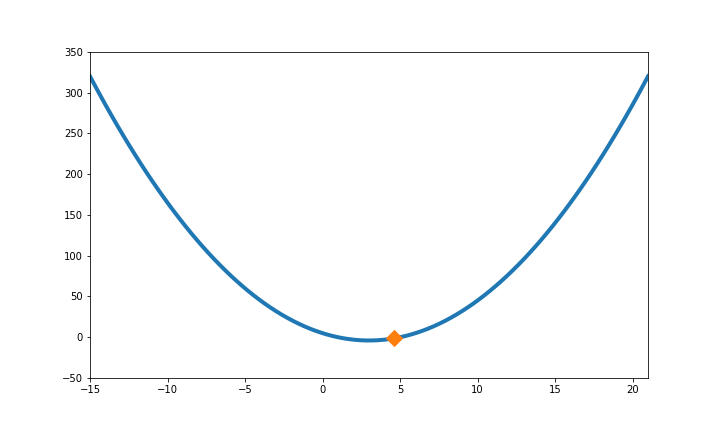
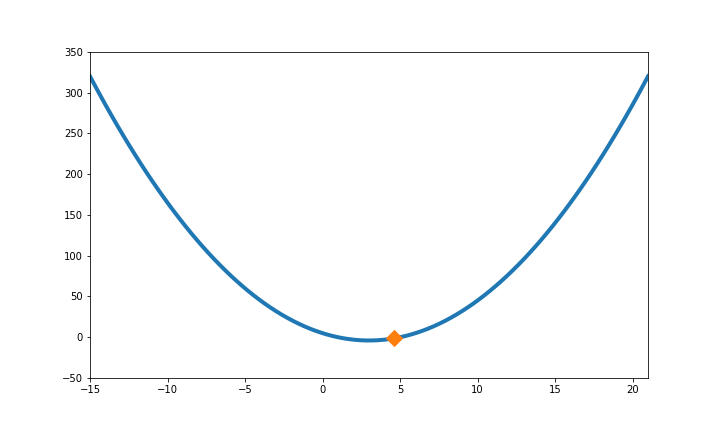
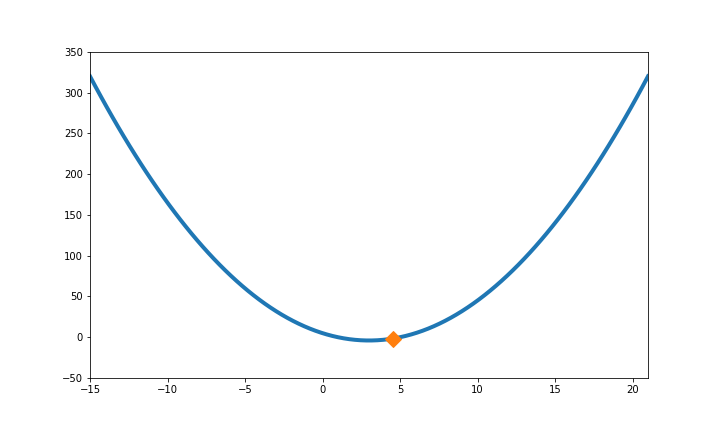
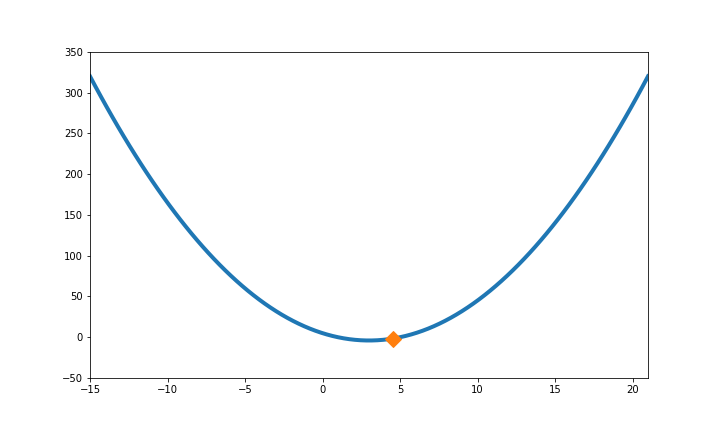
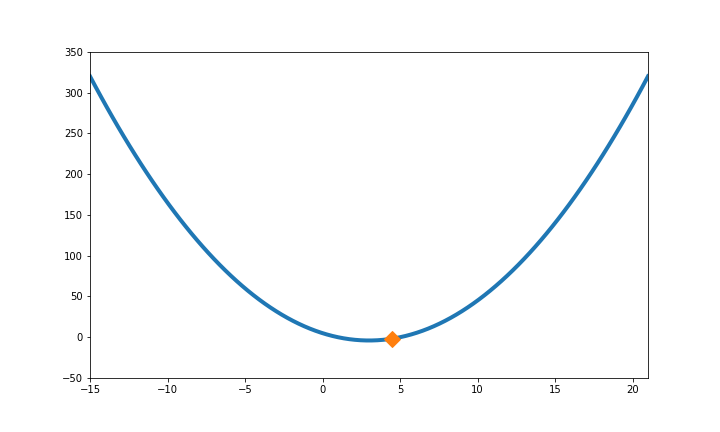
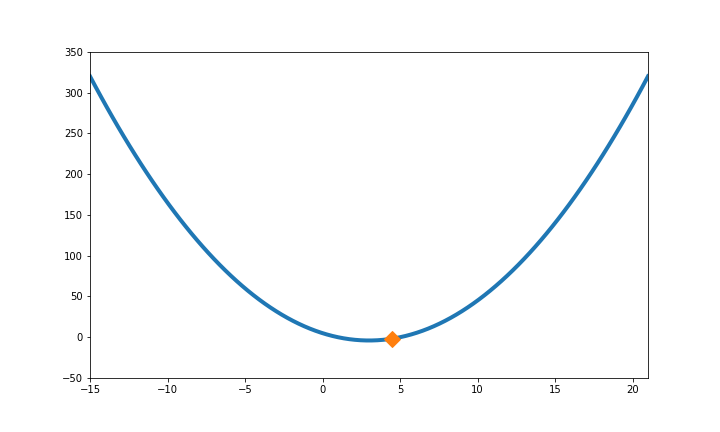
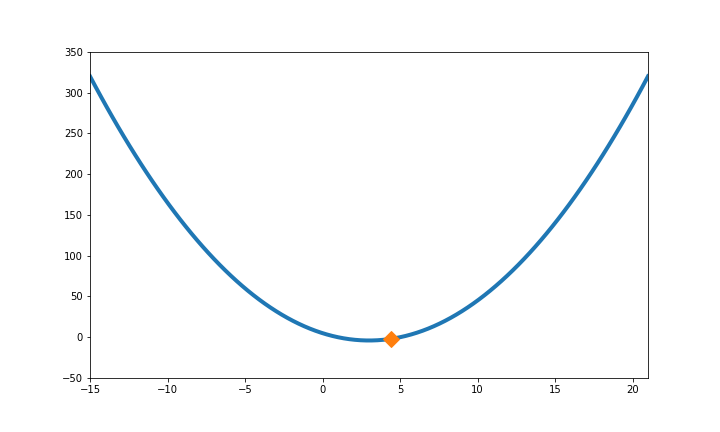
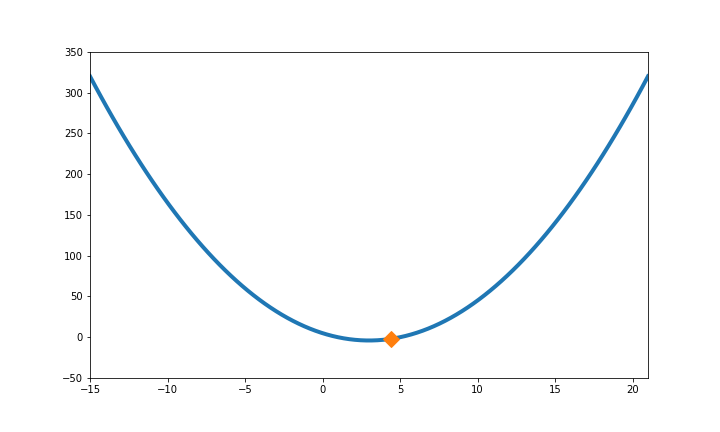
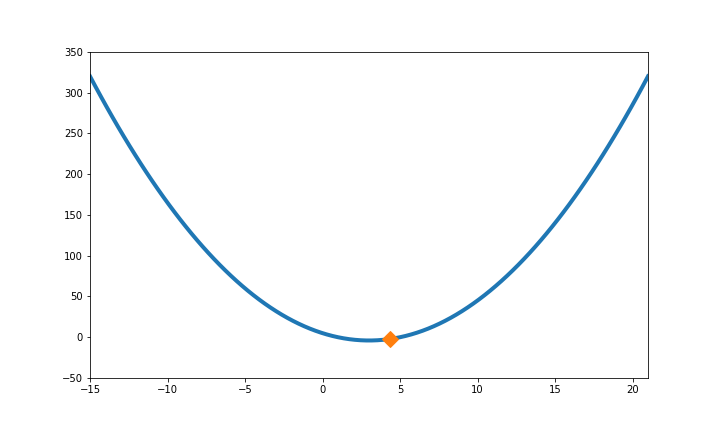
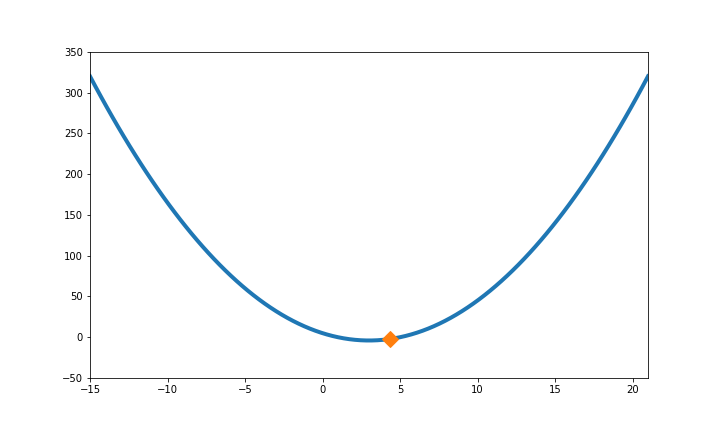
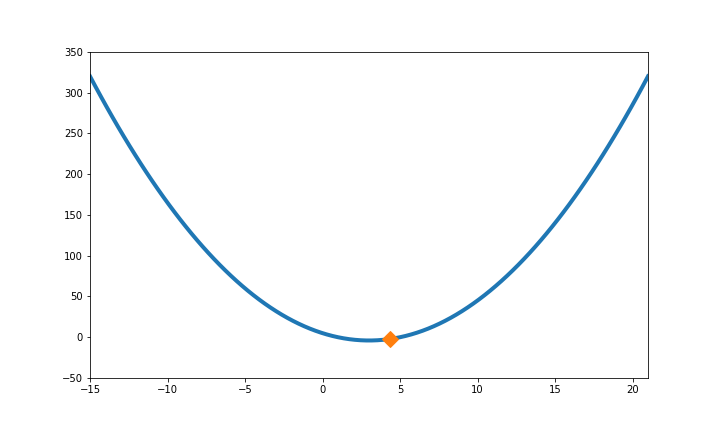
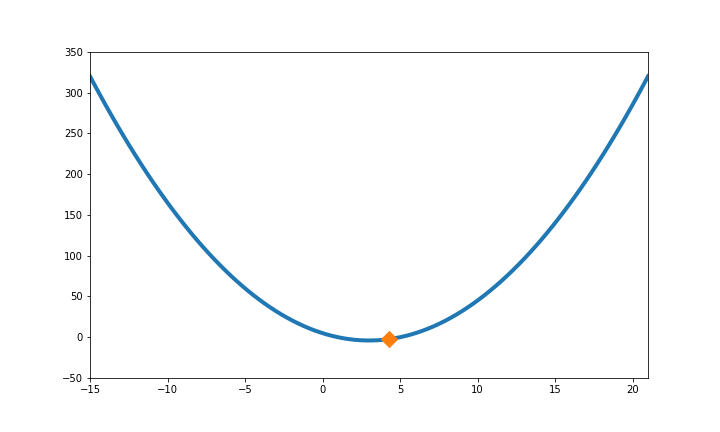
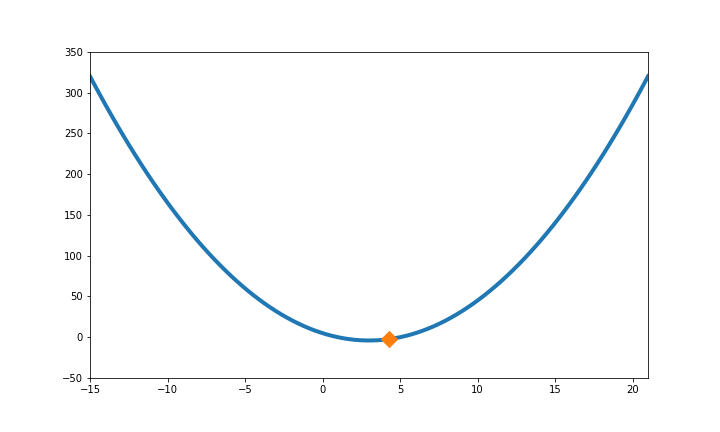
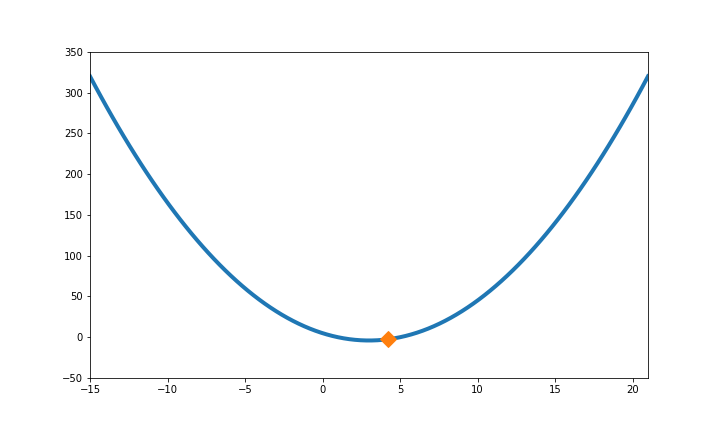
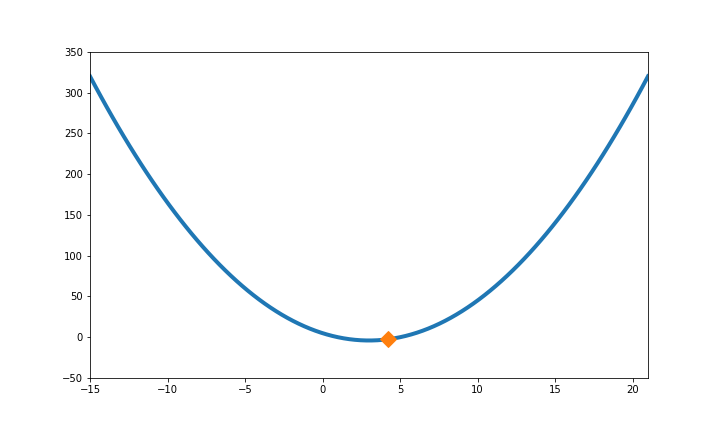
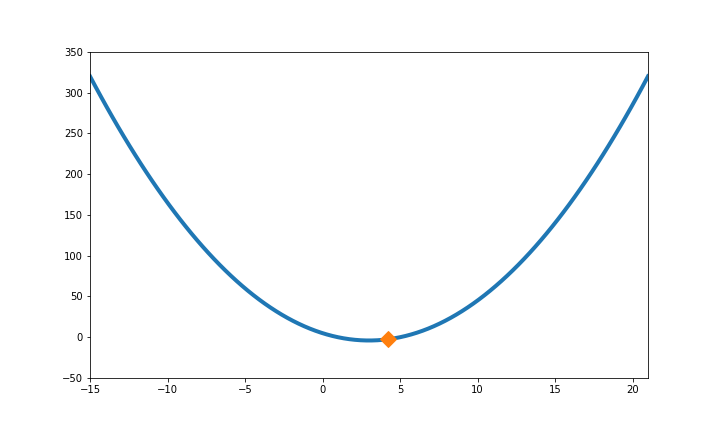
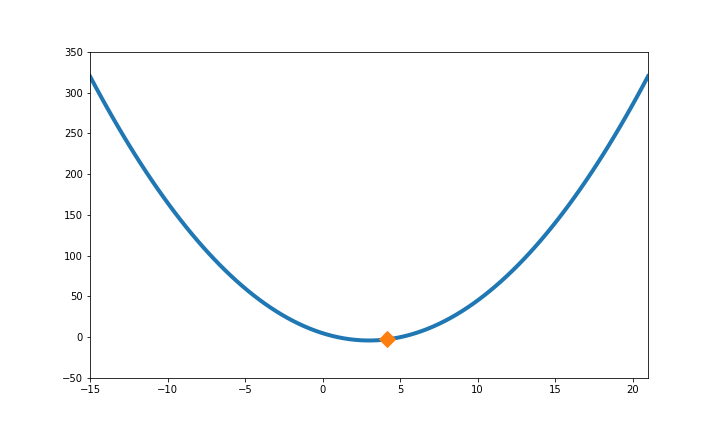
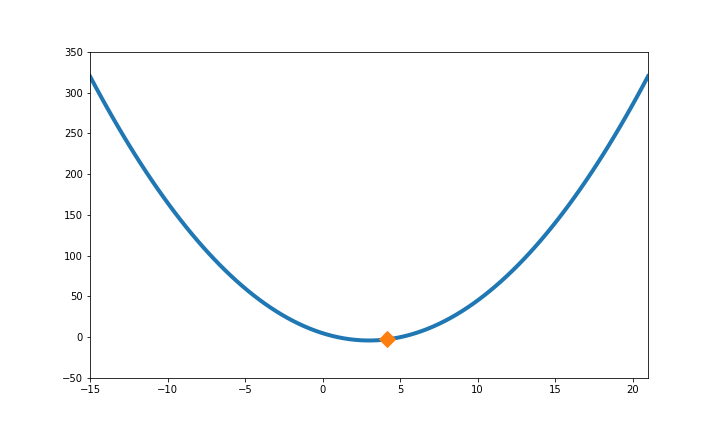
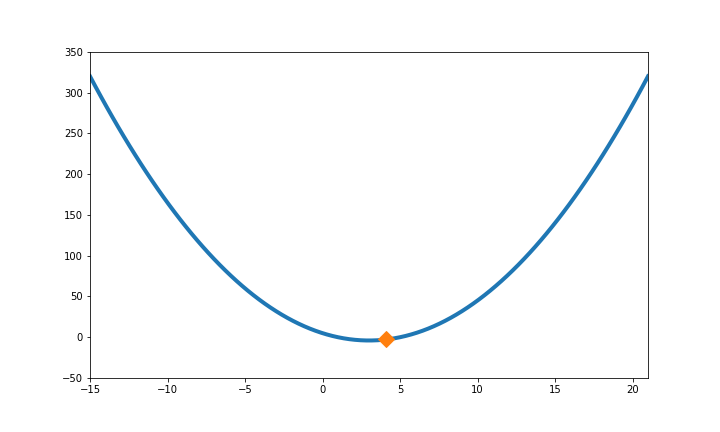
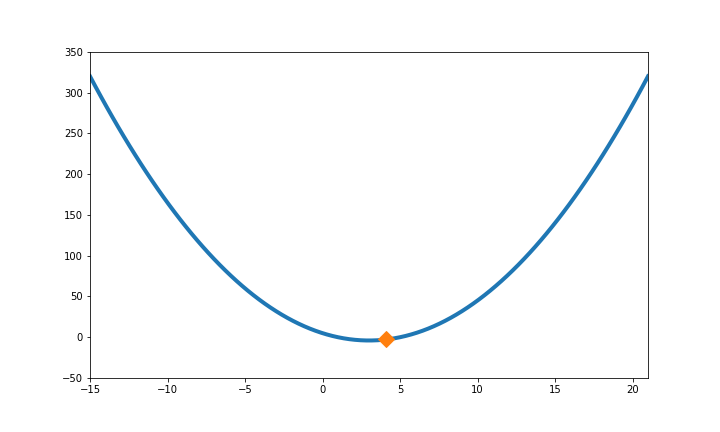
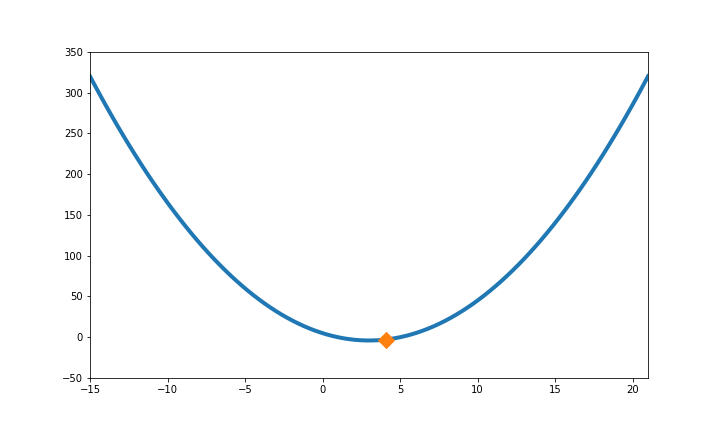
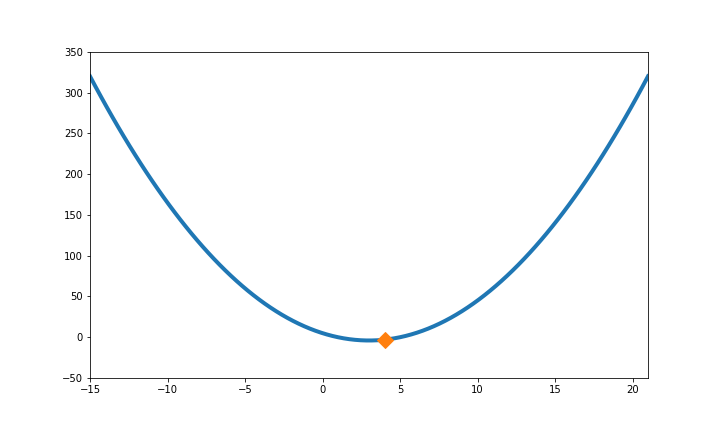
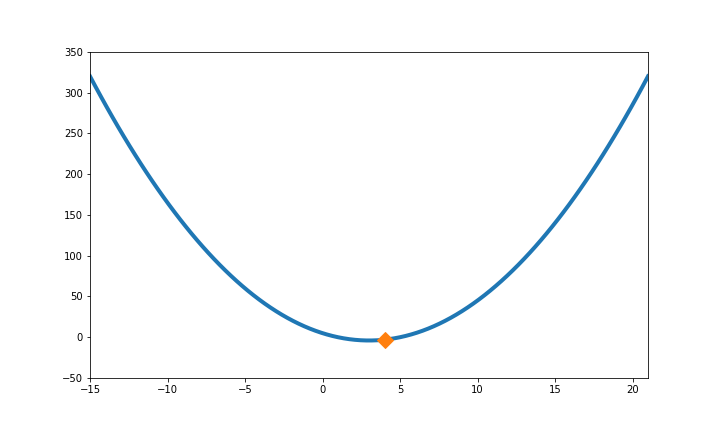
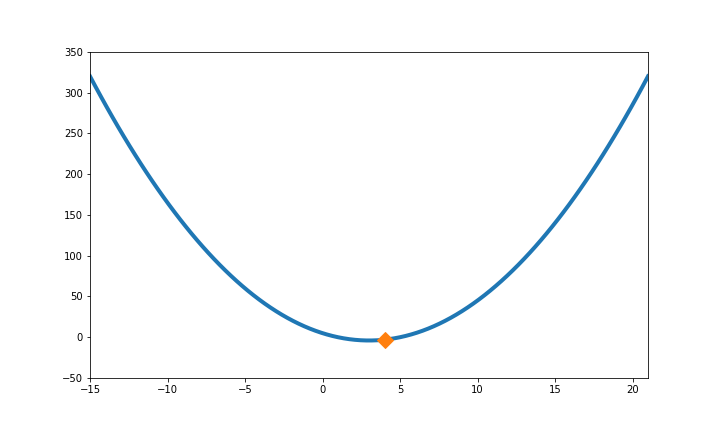
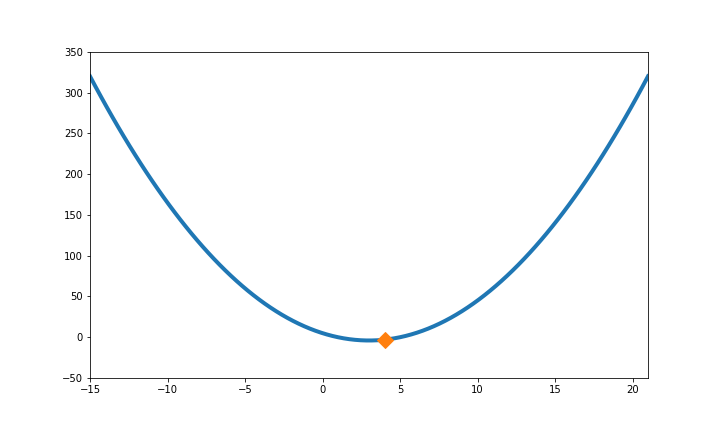
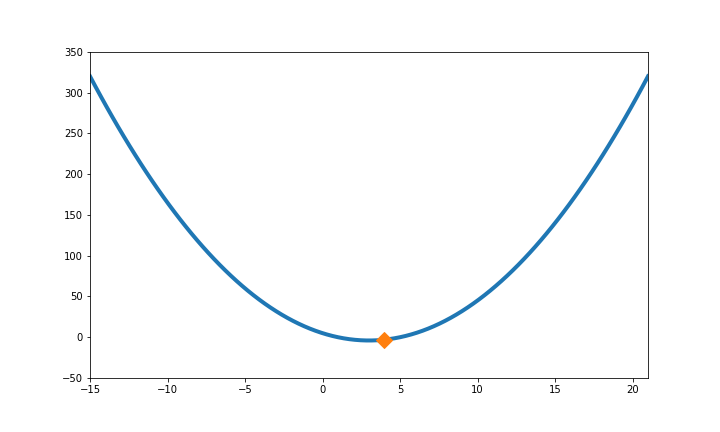
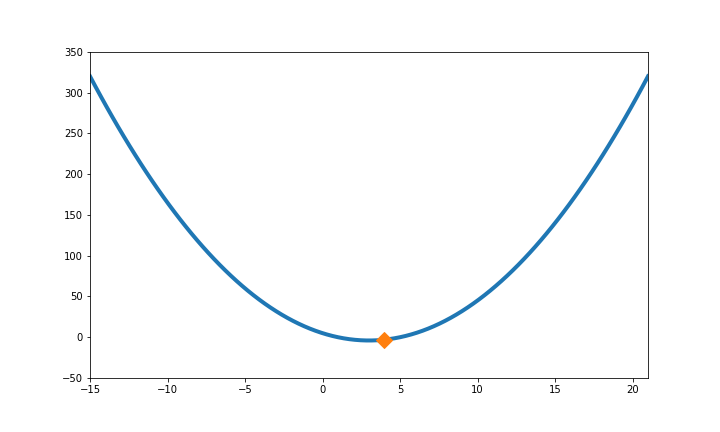
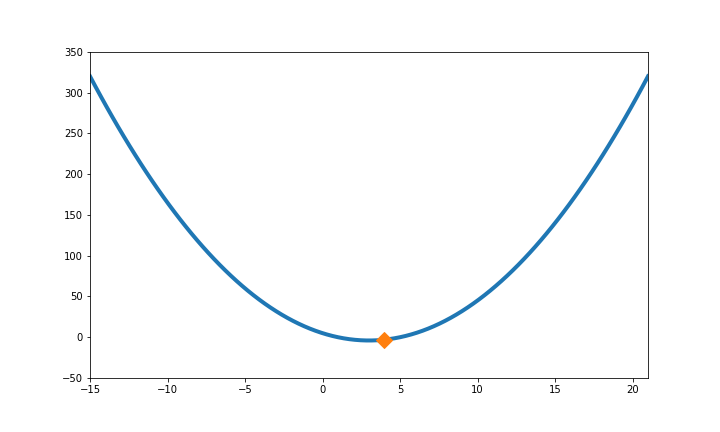
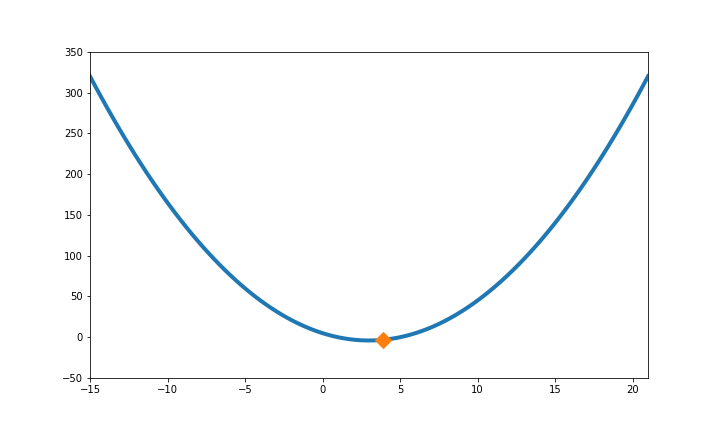
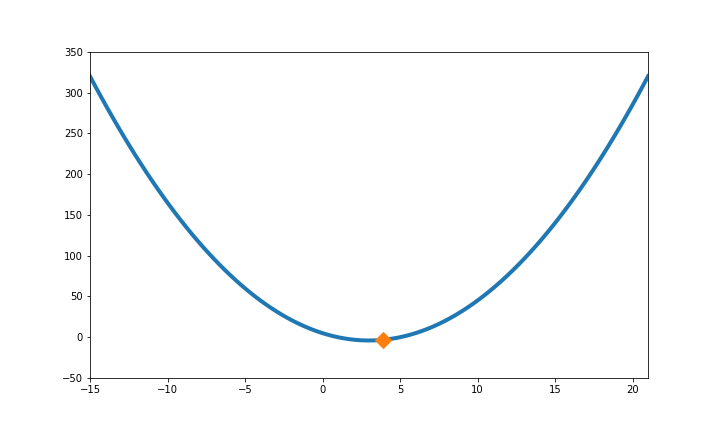
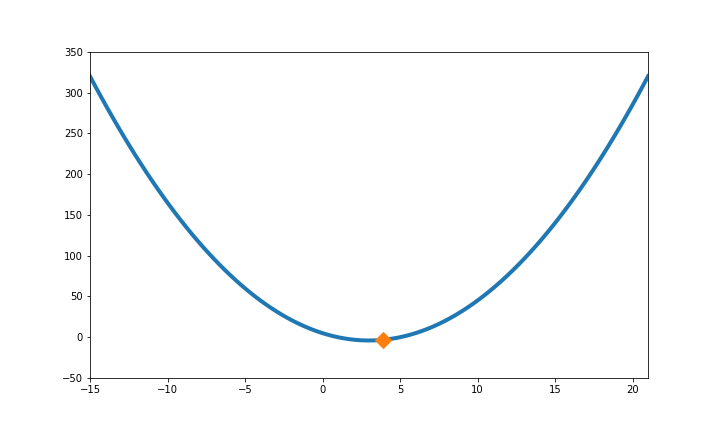
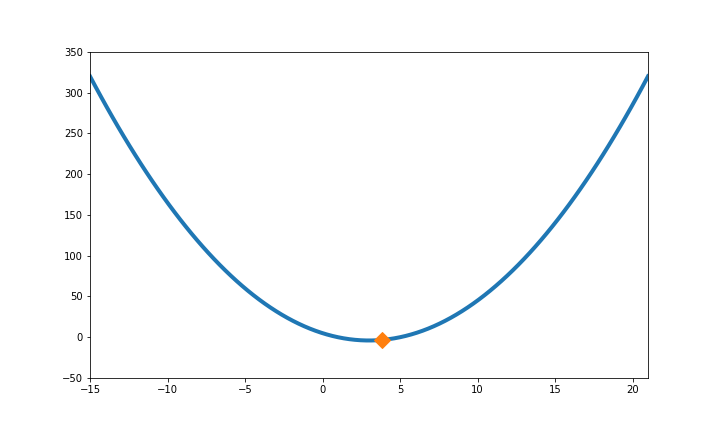
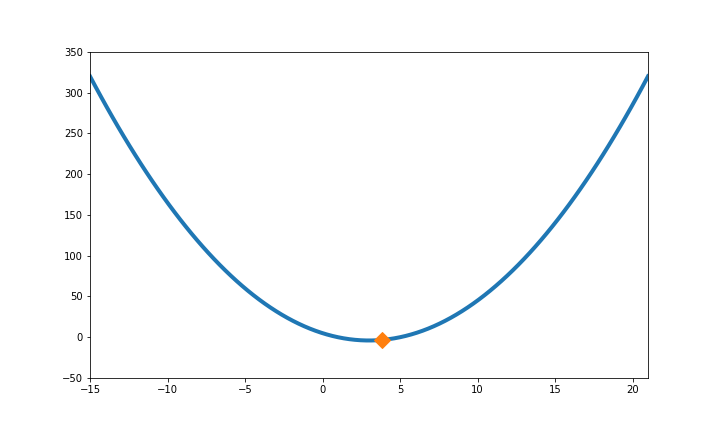
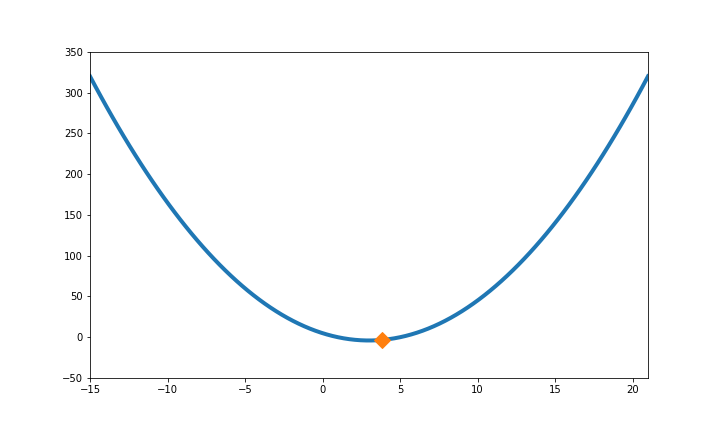
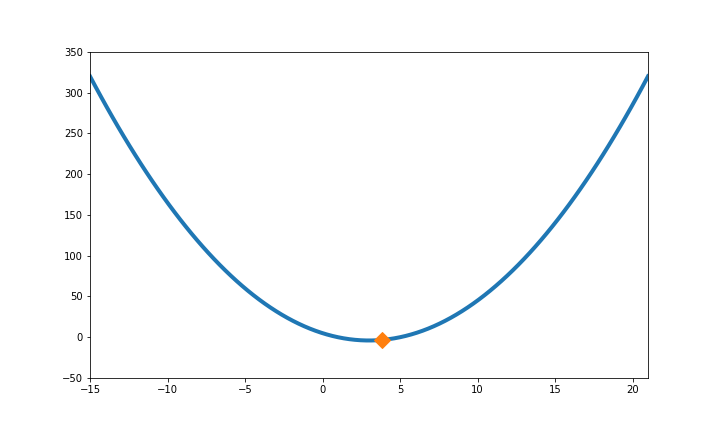
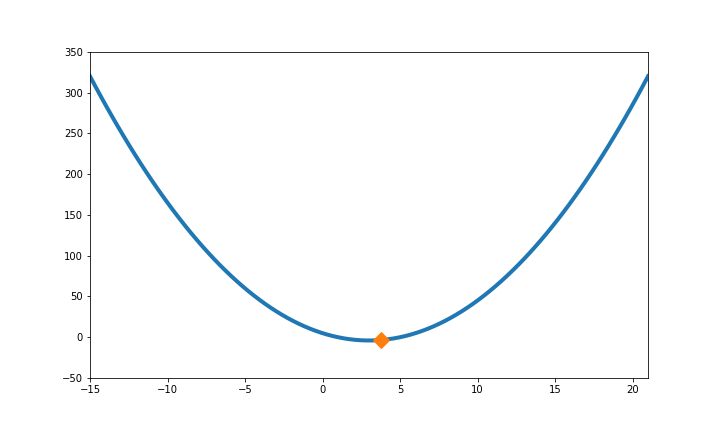
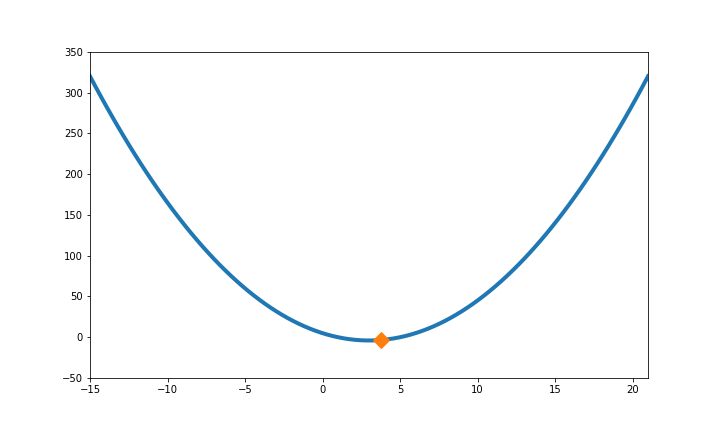
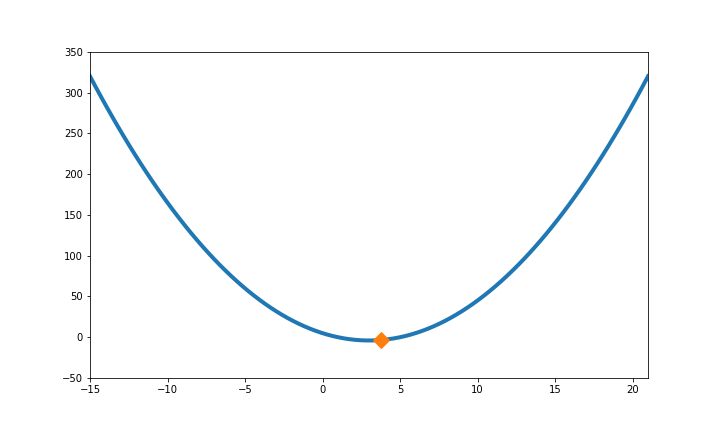
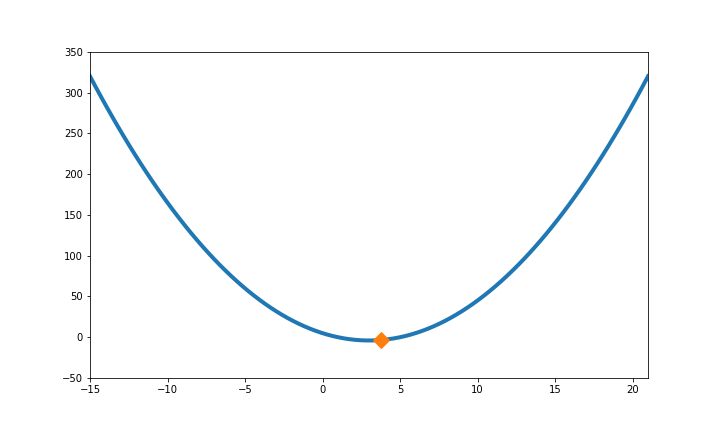
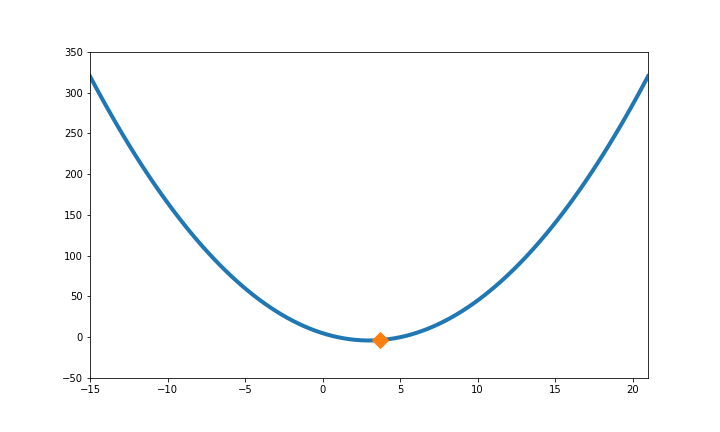
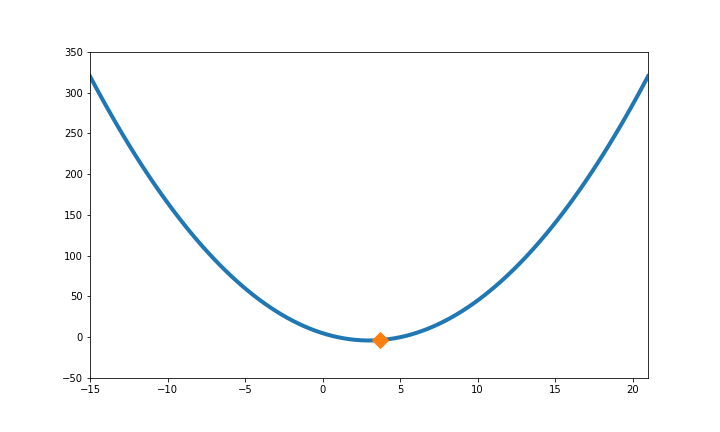
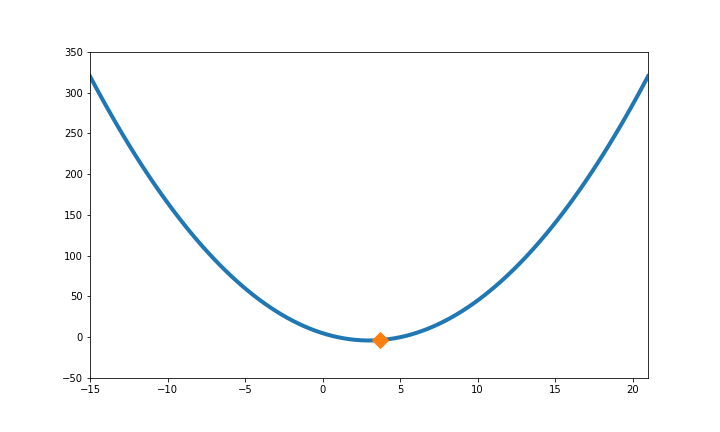
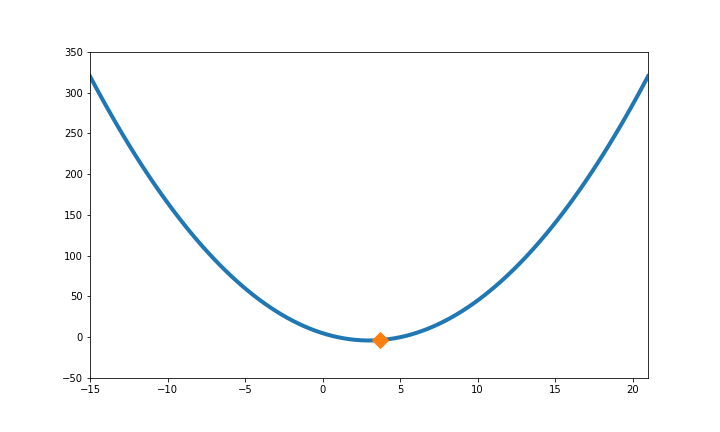
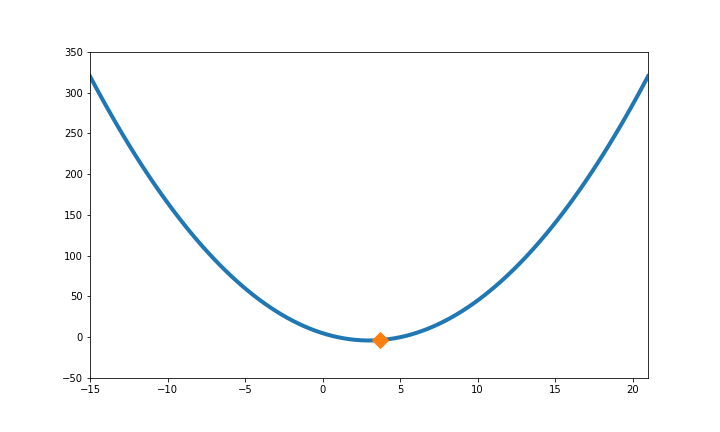
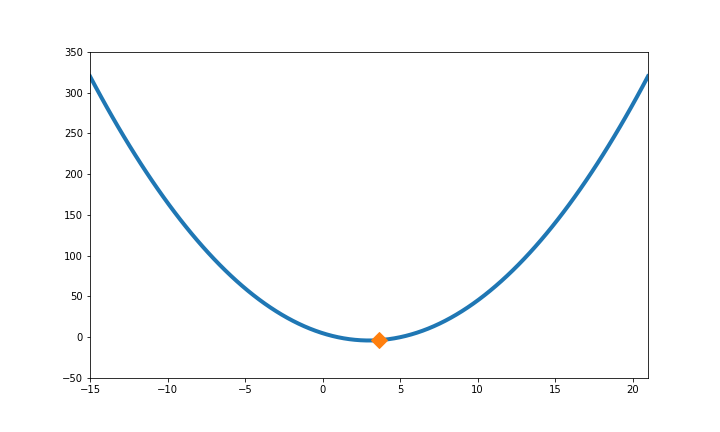
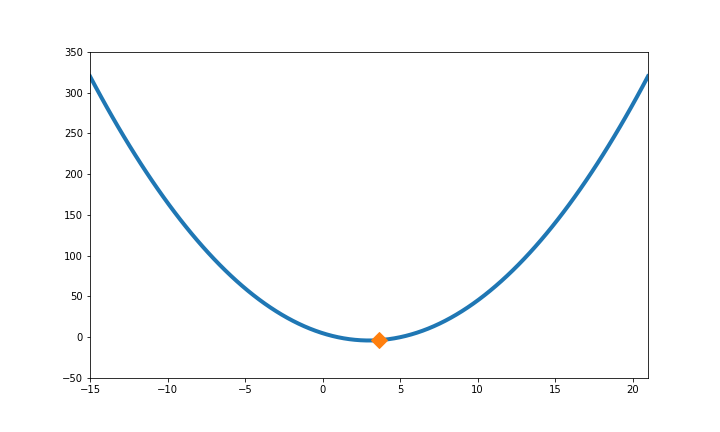
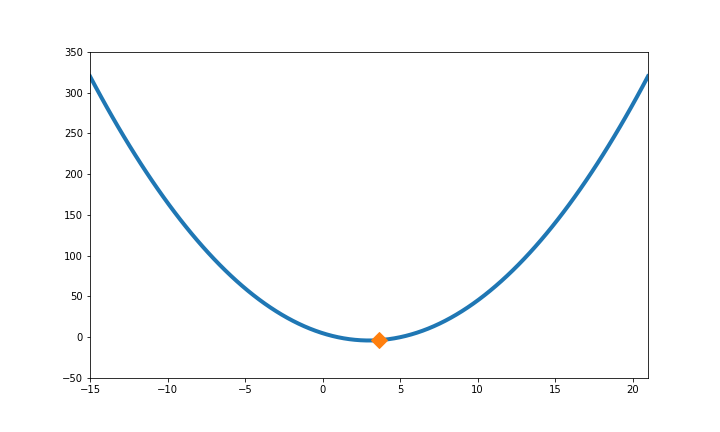
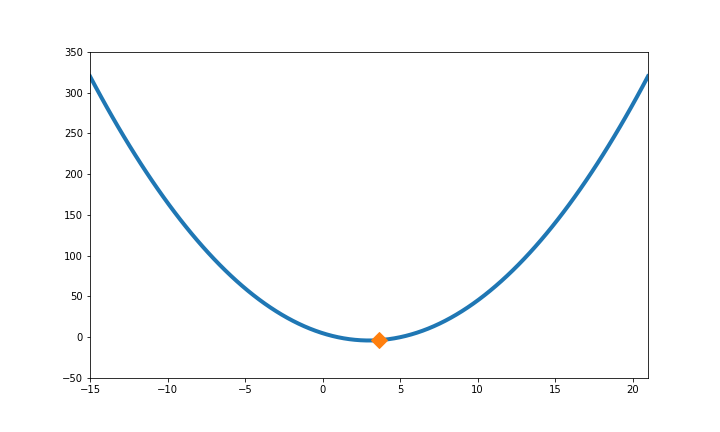
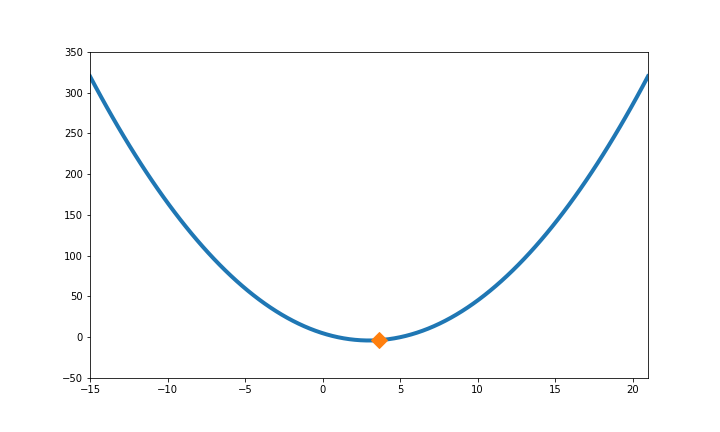
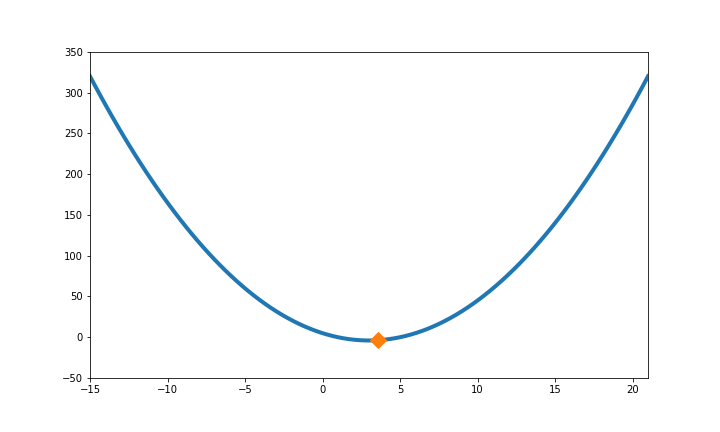
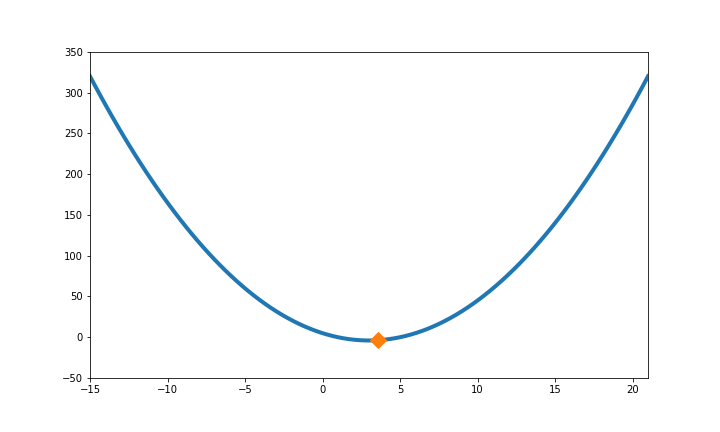
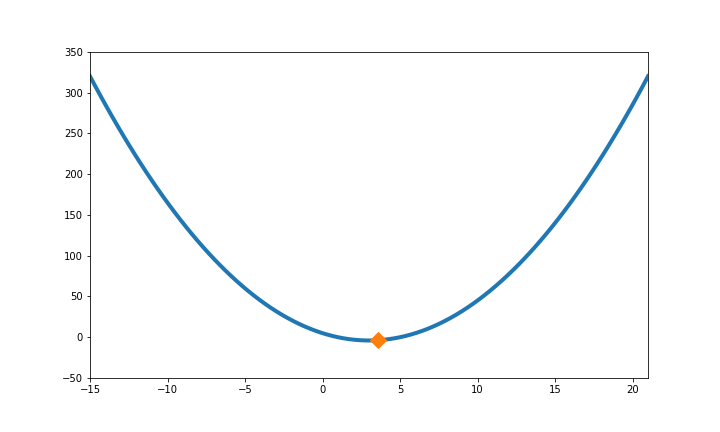
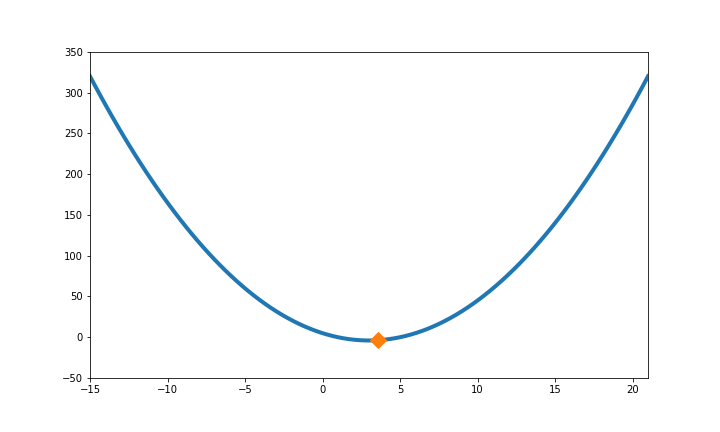
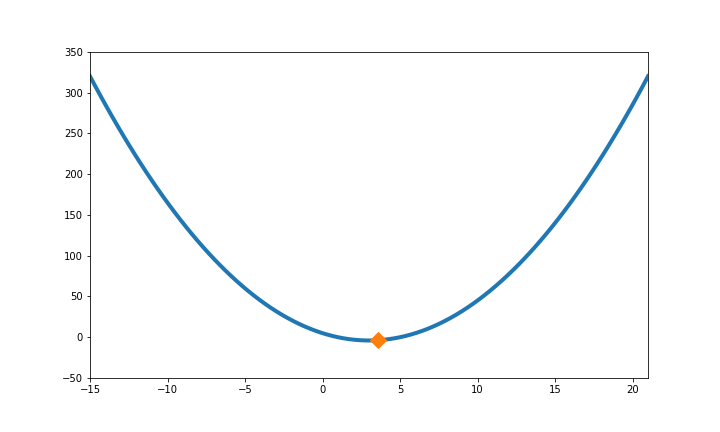
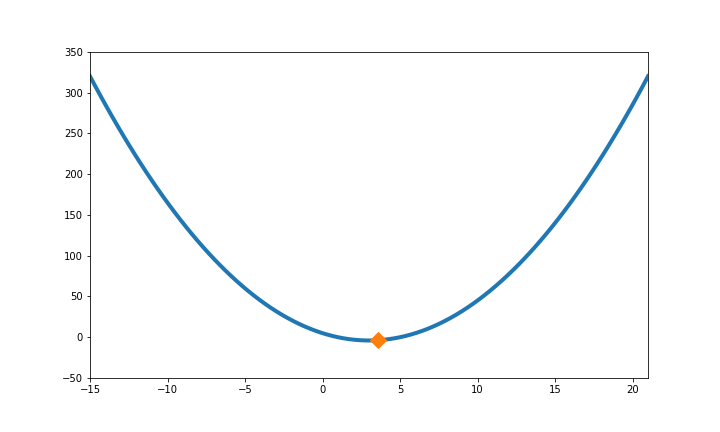
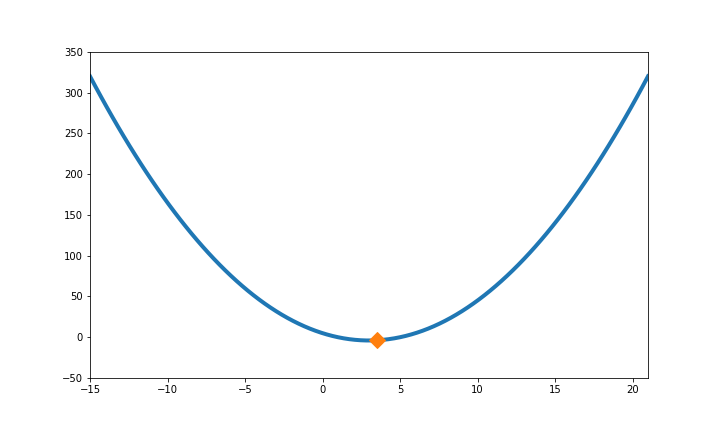
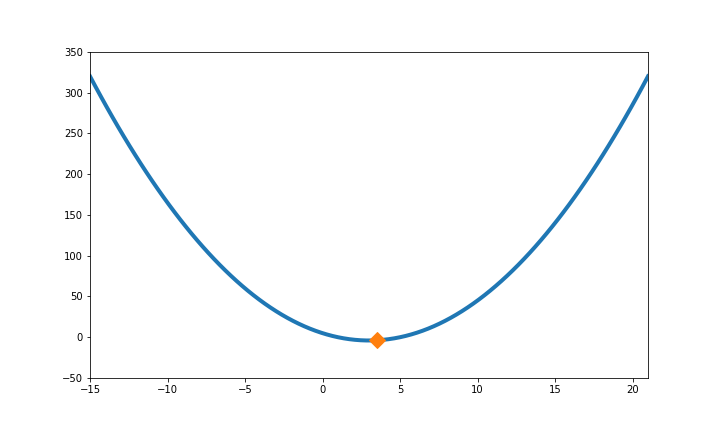
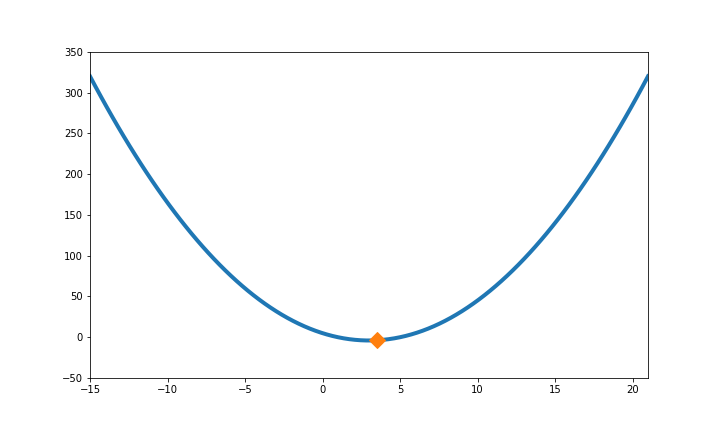
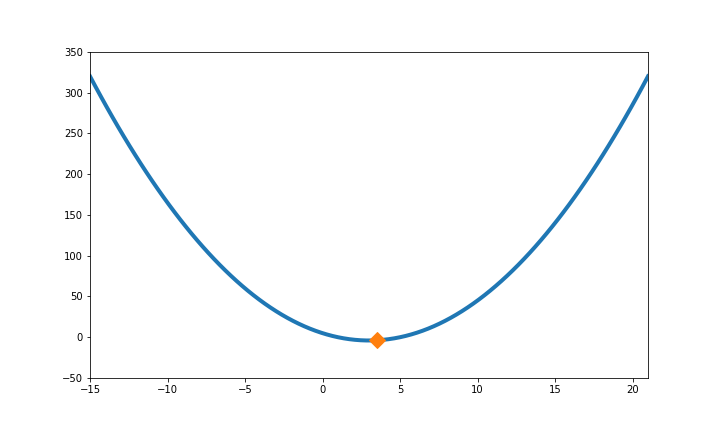

In [8]:
def init():
    line.set_data([], [])
    return line,

def animate(i):
    x_n = mins[0::10][i]
    y_n = x_n**2-6*x_n+5
    line.set_data(x_n, y_n)
    return line,

fig = plt.figure(figsize=(10, 6))
ax = plt.axes(xlim=(-15, 21), ylim=(-50, 350))
ax.plot(x,y, linewidth=4 )
line, = ax.plot([], [], "D", markersize=12)
animation.FuncAnimation(fig, animate, init_func=init,
                        frames=len(mins[0::10]), interval=200)

### Plot the squared distance to local minimum

Another important visualization of gradient descent is that there should be a visible improvement over time: In this example, we simply plot the squared distance from the local minima calculated by gradient descent and the true local minimum against the iteration during which it was calculated. As we can see, the distance gets smaller over time, but barely changes in later iterations. This measure of distance is often called the cost or loss, but the implementation differs depending on what function you're trying to minimize.

In [9]:
TOOLS = [WheelZoomTool(), ResetTool(), PanTool()]

x_iter, y_distance = (zip(*enumerate(cost)))

s1 = bp.figure(width=W, 
               height=H, 
               title='Squared distance to true local minimum', 
               tools=TOOLS,
               x_axis_label = 'Iteration',
               y_axis_label = 'Distance'
)
s1.line(x_iter, y_distance, color="navy", alpha=0.5, line_width=3)
s1.title.text_font_size = '16pt'
s1.yaxis.axis_label_text_font_size = "14pt"
s1.xaxis.axis_label_text_font_size = "14pt"


bp.show(s1)

# Linear regression

1. Download practice data from [Kaggle's house sale prediction dataset](https://www.kaggle.com/harlfoxem/housesalesprediction#kc_house_data.csv).
2. Unzip the zip file and save the CSV.

In this practice, we will use some of the features (columns) in this CSV file to predict the `price` column. This is a regression problem, because our target is a continuous value.

## $\Delta$ 3. Data preparation

In [36]:
# read data from csv using pandas dataframe

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('kc_house_data.csv')
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0      5650     1.0           0     0     ...          7        1180   
1      7242     2.0           0     0     ...          7        2170   
2     10000     1.0           0     0     ...          6         770   
3      5000     1.0           0     0     ...          7        1050   
4      8080     1.0           0     0     ...          8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

### $\Omega$ Practice 3.1. Inspect the data frame

In [11]:
# TODO: print out a snippet of the data in the data frame
df.shape

(21613, 21)

In [12]:
# TODO: sample 10000 rows from df
df = df.sample(10000)

In [13]:
# TODO: print out all column names and their data types
print(df.dtypes)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


### $\Delta$ 3.2. Choosing a subset of columns as features

In [14]:
# take a subset of the columns for practice.
df_sub = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors']]
print(df_sub.columns)

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors'], dtype='object')


Since we will predict the `price` column, we need to separate it from the "feature" columns. Conventionally, the data we use (i.e., the matrix whose rows are the training samples and whose columns are the features) are represented by variable $X$ (capitalized as this is a matrix) and the targets are represented by variable $y$ (in lowercase as this is a vector).

In [15]:
y = df_sub['price']
X = df_sub.drop(columns=['price'])

print(X.shape)
print(y.shape)
X

(10000, 4)
(10000,)


bedrooms  bathrooms  sqft_living  floors
2455          3       3.25         3960     2.0
3008          4       2.25         2020     1.5
14663         3       1.00         1590     1.5
7501          5       2.25         2640     1.0
780           3       1.00         1250     1.0
10437         3       2.50         2180     1.0
13478         4       2.50         2450     1.5
11494         3       1.75         1920     1.0
348           3       2.00         1390     1.0
17572         4       2.50         1630     2.0
14963         4       2.00         1890     1.5
9348          4       2.25         2550     2.0
276           3       2.00         2290     1.0
21062         5       2.75         2900     2.0
6205          4       2.00         1340     1.0
16866         1       1.50         1048     1.0
7134          4       1.50         1590     1.0
16877         3       3.25         4610     2.0
4113          3       1.75         1430     1.0
18918         4       2.25         2260     1.0
18463         3       1.50         1250     1.0
3883          3       2.75         1670     3.0
17412         4       3.00         4040     1.0
13290         3       1.00         1350     1.5
5702          5       4.75         6390     2.0
6215          4       1.75         2010     1.0
8595          2       1.75         1220     1.0
11133         3       2.25         1960     2.0
13808         4       2.25         1660     2.0
13265         3       1.00         1680     1.0
...         ...        ...          ...     ...
7410          3       1.75         1810     1.0
7997          2       1.00         1400     1.5
12302         4       2.50         2340     1.0
8777          4       2.50         2600     2.0
20261         5       1.50         3360     2.0
6389          5       4.50         4440     2.0
12453         2       1.00          910     1.0
17506         3       2.50         1360     2.0
4747          3       2.50         2060     2.0
7642          3       1.00         1030     1.0
11028         3       2.75         2660     1.0
1757          4       3.50         3540     2.0
20184         3       3.25         4030     2.0
19782         3       2.50         1800     2.0
21576         5       4.50         4850     2.0
10986         5       1.75         1840     1.0
4176          3       1.00         1250     1.0
19121         3       1.00         1160     1.0
14018         2       2.00         1590     1.0
11852         3       1.00         1180     1.5
17633         2       2.00         1990     1.0
1510          4       2.50         2390     2.0
1843          4       2.75         2610     1.0
10359         3       1.00         1730     1.0
20192         3       2.25         1970     2.0
9144          3       1.75         1700     1.5
17188         4       2.25         2140     1.0
14472         2       1.00         2180     1.0
3450          3       1.75         1680     1.0
13229         3       1.50         1820     1.5

[10000 rows x 4 columns]

After the split above, the four columns **"bedrooms", "bathrooms", "sqft_living", and "floors"** are so-called "features", and **"price"** is our targets.

###  Adding the dummy variable $x_0$

As introduced in class, to simplify calculation, we usually add a dummy variable $x_0=1$ in addition to all the existing columns in $X$.

In [16]:
X = np.column_stack([np.ones(X.shape[0]), X]) # x0=1
y = np.array(y)

In [17]:
print(X.shape)
print(y.shape)

(10000, 5)
(10000,)


### train-test split of the dataset

As introduced in the lecture, when developing any Machine Learning applications, it is crucial to have a separate data set to validate your model's performance.

Therefore, it is a routine to perform data set splitting before the actual model training. As this is a common step in Machine Learning model development, sklearn provides a very convenient function to achieve this train/validation split.

The function is `sklearn.model_selection.train_test_split` (http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Though what we are actually doing is train/validation split, this procedure is more commonly known as the train/test split (as in the sklearn's function name).

### Difference between validation/test set: 

- **Validation set (also called development set)**: a dataset that is used to evaluated the performance of a trained model. Technically, you, as the model developer, can look into this dataset (though it is not used in training) and gain insight from it. The purpose of this dataset is to provide you with an offline evaluation of your model's generality, and directions to fine tune your model based on performing error analysis on the model's prediction errors on the dataset.
- **Test set**: theoretically, this is the dataset that you, as the model developer, should **NEVER** look into. This dataset serves the purpose of providing the most realistic evaluation of your model. The reason why we need this dataset is because, as described above, you can use validation set to fine tune your model; and thus your model technically benefits, or indirectly learns from, the validation set. Therefore, we need a completely blind set to have the ultimate evaluation of your model.

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
# Check the splitting result by printing out the shapes of our training/testing data and targets

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 5), (2000, 5), (8000,), (2000,))

## $\Delta$ 4. Train linear regressor analytically (Advanced)

Although we have more than one features (the columns) in our training data $X$, this is still a linear regression problem, simply with more variables. Therefore, as mentioned in the class, there is still a **closed-formed** solution to find the optimal values of our coefficients $\theta^*$ using the formula below.

$$\begin{align}
H = X^T\theta \\
\theta^* = (X^TX)^{-1}X^TY \\
\end{align}$$

$\theta^*$ is the set of coefficients associated with each of our features **"bedrooms", "bathrooms", "sqft_living", and "floors"** which yield the lowest mean squared error on our training data $X$.

### $\Omega$ Practice 4.1. Calculate $\theta^*$ using the formula

In [20]:
from numpy.linalg import inv
np.dot(np.dot(inv(np.dot(X_train.T,X_train)),X_train.T),y_train)

array([ 72540.15597842, -57089.19982018,  13160.19784147,    305.88073312,
        -4412.24554678])

In [21]:
# TODO: calculate the optimal thetas
from numpy.linalg import inv
a = np.dot(X_train.T, X_train)
b = inv(a)
c = np.dot(b, X_train.T)
theta = np.dot(c, y_train)

In [22]:
# print out your coefficients
print(f'coefficients: {theta}')

coefficients: [ 72540.15597842 -57089.19982018  13160.19784147    305.88073312
  -4412.24554678]


## Train linear regressor using Sklearn

Fortunately, for most of established machine learning algorithms, such as Linear Regression, we do not need to implmenet the optimization ourselves. Sklearn, as a general Python Machine Learning library, offers implementations of a wide range of commonly used models. All you need to do is to import the appropriate modules from sklearn, and call `.fit(X, y)` to fit (train/optmize) your chosen model on the training data $X$ and its associated labels $y$.

In [23]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### $\Omega$ Pratice 4.2. Inspect the coefficients optimized by sklearn

In Pratice 4.1, you may have used the closed-form solution to find the optimal set of cofficients $\theta^*$. In this part, you will need to find their counterpart optimized by sklearn.

Useful resources: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html (hint: Look at the examples)

In [24]:
# TODO: find out the coefficients and intercept optimized by the sklearn LinearRegression object `regressor` above.
# and compare them with \theta^* you got from Practice 4.1

theta = regressor.coef_
theta[0] = regressor.intercept_
print(theta[0]) # this is almost exactly the same as our exact solution above
print(theta)


72540.15597838681
[ 72540.15597839 -57089.19982018  13160.19784147    305.88073312
  -4412.24554678]


### Evaluate linear regressor

Since we are now done with our **phase 1: training time** (i.e., we have finished model optimization on our training data), we move on to our **phase 2: validation time**, where we need to evaluate how good our trained model is on a validation set. This validation set is the `X_test`, and `y_test` we got from the **train-test split of the dataset** step above.

In order to evaluate the model quality on `X_test`, we need to first use our trained model `regressor` to predict the outcome on `X_test`.

In [25]:
y_pred = regressor.predict(X_test)

In [26]:
# you can inspect what `y_pred` is. It is a 1-d vector (basically a list) of float numbers.
# and visually compare each individual prediction with the ground truth in `y_test`.
for i, yi in enumerate(y_pred):
    print(f'y_pred: {yi}\ty_truth: {y_test[i]}')

y_pred: 312346.2013503431	y_truth: 595000.0
y_pred: 500561.25780440285	y_truth: 353000.0
y_pred: 545980.883514871	y_truth: 570000.0
y_pred: 410459.2780793751	y_truth: 311000.0
y_pred: 259883.99246089952	y_truth: 403000.0
y_pred: 585586.4206505902	y_truth: 449000.0
y_pred: 803845.6678561203	y_truth: 770000.0
y_pred: 716708.4388494405	y_truth: 700000.0
y_pred: 403960.57746140176	y_truth: 458000.0
y_pred: 303306.96487282234	y_truth: 238000.0
y_pred: 531243.3877297745	y_truth: 289950.0
y_pred: 767337.2074510884	y_truth: 599950.0
y_pred: 705270.1068688477	y_truth: 788500.0
y_pred: 781971.5322791492	y_truth: 360000.0
y_pred: 994519.8618669659	y_truth: 540000.0
y_pred: 426781.45420912787	y_truth: 234000.0
y_pred: 631490.3032735728	y_truth: 480000.0
y_pred: 274175.50073292153	y_truth: 340000.0
y_pred: 511734.33309668984	y_truth: 210000.0
y_pred: 370001.0563858003	y_truth: 195000.0
y_pred: 720795.3856542043	y_truth: 340000.0
y_pred: 783500.9359447728	y_truth: 545000.0
y_pred: 627325.7966010759	

y_pred: 390307.0083632812	y_truth: 521450.0
y_pred: 566484.0630622869	y_truth: 390000.0
y_pred: 341469.26202036097	y_truth: 273500.0
y_pred: 396193.38089665544	y_truth: 530000.0
y_pred: 977657.6416112394	y_truth: 1520000.0
y_pred: 507647.3862919262	y_truth: 590000.0
y_pred: 558772.6537109998	y_truth: 470000.0
y_pred: 445365.54032573156	y_truth: 344950.0
y_pred: 390234.7244046558	y_truth: 621000.0
y_pred: 614165.598759606	y_truth: 355000.0
y_pred: 1050134.934700556	y_truth: 700000.0
y_pred: 643065.8207703864	y_truth: 693000.0
y_pred: 715337.4828198852	y_truth: 328950.0
y_pred: 500814.2725877971	y_truth: 425000.0
y_pred: 485164.0501911311	y_truth: 530000.0
y_pred: 497134.0228278144	y_truth: 220000.0
y_pred: 566826.8796183257	y_truth: 429000.0
y_pred: 791379.1964020112	y_truth: 572000.0
y_pred: 500655.3144173021	y_truth: 515000.0
y_pred: 592325.4777418202	y_truth: 355000.0
y_pred: 628003.0262432706	y_truth: 339989.0
y_pred: 737674.1026550969	y_truth: 358000.0
y_pred: 380205.61785305856	y_

y_pred: 539957.3254652759	y_truth: 382000.0
y_pred: 720195.715879743	y_truth: 250000.0
y_pred: 444187.55702585645	y_truth: 575000.0
y_pred: 281608.2842115121	y_truth: 334000.0
y_pred: 789776.9982433356	y_truth: 575000.0
y_pred: 381752.02879827475	y_truth: 670000.0
y_pred: 524663.2888090396	y_truth: 255000.0
y_pred: 840439.7814041686	y_truth: 484000.0
y_pred: 521604.4814777923	y_truth: 670000.0
y_pred: 734152.8110656091	y_truth: 452000.0
y_pred: 432899.0688716224	y_truth: 550000.0
y_pred: 362546.50025293574	y_truth: 300000.0
y_pred: 341134.8489342051	y_truth: 120750.0
y_pred: 864559.3302228246	y_truth: 750000.0
y_pred: 537266.9457793698	y_truth: 348450.0
y_pred: 566380.8921052513	y_truth: 650000.0
y_pred: 591297.3382683035	y_truth: 423800.0
y_pred: 761477.5231597926	y_truth: 822000.0
y_pred: 299648.48776711366	y_truth: 250000.0
y_pred: 761356.7783048148	y_truth: 382000.0
y_pred: 728425.3967027296	y_truth: 1017000.0
y_pred: 307256.72616136516	y_truth: 290000.0
y_pred: 523326.34733866976	

y_pred: 391121.42352169676	y_truth: 610000.0
y_pred: 643400.2338565423	y_truth: 730000.0
y_pred: 308824.90976085543	y_truth: 372500.0
y_pred: 965499.9721539838	y_truth: 650000.0
y_pred: 624250.4925246625	y_truth: 825000.0
y_pred: 348589.4050670696	y_truth: 285000.0
y_pred: 1018853.135000723	y_truth: 931088.0
y_pred: 1351372.1801493769	y_truth: 960000.0
y_pred: 881112.7484816976	y_truth: 718000.0
y_pred: 1148797.169899698	y_truth: 1395710.0
y_pred: 464515.2816576113	y_truth: 423000.0
y_pred: 925735.4768477695	y_truth: 697000.0
y_pred: 452280.0523326224	y_truth: 405000.0
y_pred: 615305.312660041	y_truth: 435000.0
y_pred: 337382.3152155971	y_truth: 508300.0
y_pred: 379177.478379542	y_truth: 440150.0
y_pred: 348264.10632505	y_truth: 640000.0
y_pred: 355735.15920308064	y_truth: 672000.0
y_pred: 402079.75343002967	y_truth: 499950.0
y_pred: 543637.5752252585	y_truth: 683500.0
y_pred: 603086.5800802181	y_truth: 409500.0
y_pred: 422000.7810170034	y_truth: 425000.0
y_pred: 510294.2206692844	y_tr

Then we can choose a set of evaluation metrics appropriate to our current task, i.e., regression, to compare our predicted values `y_pred` against the ground-truth `y_test`.

Sklearn, as a general Python Machine Learning package, offers common evaluation metrics out of the box. In class, we introduced **r2**, **mean absolute error**, and **mean squared error**. All of them can be found in `sklearn.metrics` module. Useful resources: https://scikit-learn.org/stable/modules/model_evaluation.html

In [27]:
from sklearn.metrics.regression import r2_score, mean_absolute_error, mean_squared_error

def evaluate(y_pred, y_test):
    r2 = r2_score(y_pred=y_pred, y_true=y_test)
    mse = mean_squared_error(y_pred=y_pred, y_true=y_test)
    mae = mean_absolute_error(y_pred=y_pred, y_true=y_test)

    print(f'r2: {r2}')
    print(f'mse: {mse}')
    print(f'mae: {mae}')

In [28]:
evaluate(y_pred, y_test)

r2: 0.4414526235573605
mse: 71438382393.19743
mae: 189163.83387157574


### Train linear regressor with standardized features

In general, it is a good idea to perform certain preprocessing steps, such as feature standardization and normalization, imputation, outlier removal, on your training data. Especially when you are using models which are very sensitive to outliers and individual feature magnitude, such as Linear Regression models. For other more robust models, these steps may make little difference but rarely harm. Therefore, it is generally recommended to perform these preprocessing steps, unless proved otherwise.

sklearn's `preprocessing` module provides a variety of common preprocessing steps.

https://scikit-learn.org/stable/modules/preprocessing.html


In [29]:
# Use StandardScaler to standardize our training data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit this StandardScaler on our training data, i.e., estimating the mean and variance base don our training data
scaler.fit(X_train)

# use the fitted StandardScaler object "scaler" to transform X_train, i.e., to actually performing standardization on X_train
X_train = scaler.transform(X_train)

### the above two step can be combined into one step (which is more commonly used than the two steps approach)
### X_train = scaler.fit_transform(X_train)

### $\Omega$ Pratice 4.3. Fit LinearRegression model on this standardized training set now

In [30]:
# TODO: fit regressor on the standardized training data `X_train` now
# print out the new coefficients and intercept

regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Evaluate the new model with standardized features

To evaluate our new model, similarly to what we have done in the **Evaluate linear regressor** step, we need to first produce predictions of `X_test` using our newly trained model.

**EXTREMELY IMPORTANT (READ CAREFULLY):** If your applied any preprocessing steps in training time, you need to perform the same steps in prediction time as well!! Remember in the **Building Blocks of Machine Learning Applications** diagram, in phase 2, we always apply exactly the same set of feature extraction steps to convert raw data into matrices before fed into our trained model. **However, at training time, you may have used X_train = `scaler.fit_transform(X_train)` to transform your training data; at prediction time, NEVER use `.fit()` again!** Calling `.fit()` again on X_test would likely to produce inconsistent preprocessing result and make your trained model invalid or unusable.

Instead, we simply use `X_test=scaler.transform(X_test)`


In [31]:
X_test = scaler.transform(X_test)

### $\Omega$ Pratice 4.4. Evaluate the new model

In [32]:
# TODO: get the evaluation result on your new model by the same set of evaluation metrics: r2_score, mse, and mae
# Is the new performance better or worse than before?
evaluate(y_pred=regressor.predict(X_test), y_test=y_test)

r2: 0.4750703049554984
mse: 67138670533.14273
mae: 171909.4682550439
